In [ ]:
!pip install ta
!pip install pandas_ta
!pip install breeze-connect==1.0.40

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=9153ff88d93f9a0abe8e0c04c1d007cb478dc2483ad36cab05d0f54d72f3a4e2
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=250d75f25f7dc5175b406253d0b5de3821c53d7b47aa4b53066c84b2a7005350
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime , timedelta
import datetime
from dateutil.relativedelta import relativedelta,TH , TU
import warnings
warnings.filterwarnings('ignore')
import ta
import pandas_ta as ta
import matplotlib.pyplot as plt

import pickle
import time
import json


import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from breeze_connect import BreezeConnect

# Initialize SDK
breeze = BreezeConnect(api_key="f65&396497Vq0161W2d18ngV35%5755@")

# Obtain your session key from https://api.icicidirect.com/apiuser/login?api_key=YOUR_API_KEY
# Incase your api-key has special characters(like +,=,!) then encode the api key before using in the url as shown below.
import urllib
print("https://api.icicidirect.com/apiuser/login?api_key="+urllib.parse.quote_plus("your_api_key"))

# Generate Session
breeze.generate_session(api_secret="5l88!0708cJ04~74!X1V71a90j4~392+",
                        session_token="31654961")

https://api.icicidirect.com/apiuser/login?api_key=your_api_key


In [ ]:
n = breeze.get_historical_data_v2(interval="1day",
                            from_date= "2023-01-01T07:00:00.000Z",
                            to_date= "2023-12-31T07:00:00.000Z",
                            stock_code="NIFTY",
                            exchange_code="NSE",
                            product_type="cash")

m1 =pd.DataFrame(n['Success'])
m1.index = m1.datetime
m1.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' }  , inplace = True)
m1.rename( {'datetime' : 'date'} , inplace = True)
m1

close      high       low      open
datetime                                                   
2023-01-02 00:00:00  18197.45  18215.15  18086.50  18131.70
2023-01-03 00:00:00  18232.55  18251.95  18149.80  18163.20
2023-01-04 00:00:00  18042.95  18243.00  18020.60  18230.65
2023-01-05 00:00:00  17992.15  18120.30  17892.60  18101.95
2023-01-06 00:00:00  17859.45  18047.40  17795.55  18008.05
...                       ...       ...       ...       ...
2023-12-22 00:00:00  21332.35  21389.90  21233.50  21295.85
2023-12-26 00:00:00  21454.15  21476.30  21329.60  21365.20
2023-12-27 00:00:00  21648.95  21674.95  21497.65  21497.65
2023-12-28 00:00:00  21773.70  21798.60  21678.20  21715.00
2023-12-29 00:00:00  21728.30  21762.40  21677.30  21728.90

[246 rows x 4 columns]

In [ ]:
n = breeze.get_historical_data_v2(interval="1day",
                            from_date= "2022-01-01T07:00:00.000Z",
                            to_date= "2023-12-31T07:00:00.000Z",
                            stock_code="ITC",
                            exchange_code="NSE",
                            product_type="cash")

m =pd.DataFrame(n['Success'])
m.index = m.datetime
m.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' }  , inplace = True)
m.rename( {'datetime' : 'date'} , inplace = True)
m

close    high     low    open
datetime                                           
2022-01-03 00:00:00  219.15  219.85  217.05  218.05
2022-01-04 00:00:00  219.80  221.70  219.05  219.50
2022-01-05 00:00:00  220.25  221.50  218.65  219.65
2022-01-06 00:00:00  218.80  220.40  218.20  219.00
2022-01-07 00:00:00  218.45  220.65  217.50  219.80
...                     ...     ...     ...     ...
2023-12-22 00:00:00  454.20  455.90  450.65  453.00
2023-12-26 00:00:00  457.35  458.90  454.75  456.05
2023-12-27 00:00:00  456.60  458.35  453.80  457.00
2023-12-28 00:00:00  463.95  464.70  456.15  457.20
2023-12-29 00:00:00  462.25  467.90  461.35  466.00

[494 rows x 4 columns]

In [ ]:
nifty_cons = ['ADAENT','ADAPOR', 'APOHOS', 'ASIPAI' , 'AXIBAN' , 'BAAUTO', 'BAJFI', 'BAFINS' , 'BHAPET', 'BHAAIR', 'BRIIND', 'CIPLA', 'COALIN', 'DIVLAB', 'DRREDD', 'EICMOT', 'GRASIM', 'HCLTEC', 'HDFBAN', 'HDFSTA', 'HERHON', 'HINDAL', 'HINLEV', 'ICIBAN', 'INDBA', 'INFTEC', 'ITC', 'JSWSTE', 'KOTMAH', 'LARTOU', 'LTINFO', 'MAHFIN', 'MARUTI', 'NESIND', 'NTPC' , 'ONGC', 'POWGRI', 'RELIND', 'SBILIF', 'STABAN', 'SUNPHA', 'TCS', 'TATGLO', 'TATMOT', 'TATSTE', 'TECMAH', 'TITIND', 'ULTCEM', 'UNIP', 'WIPRO' ]

In [ ]:
nifty_cons

['ADAENT',
 'ADAPOR',
 'APOHOS',
 'ASIPAI',
 'AXIBAN',
 'BAAUTO',
 'BAJFI',
 'BAFINS',
 'BHAPET',
 'BHAAIR',
 'BRIIND',
 'CIPLA',
 'COALIN',
 'DIVLAB',
 'DRREDD',
 'EICMOT',
 'GRASIM',
 'HCLTEC',
 'HDFBAN',
 'HDFSTA',
 'HERHON',
 'HINDAL',
 'HINLEV',
 'ICIBAN',
 'INDBA',
 'INFTEC',
 'ITC',
 'JSWSTE',
 'KOTMAH',
 'LARTOU',
 'LTINFO',
 'MAHFIN',
 'MARUTI',
 'NESIND',
 'NTPC',
 'ONGC',
 'POWGRI',
 'RELIND',
 'SBILIF',
 'STABAN',
 'SUNPHA',
 'TCS',
 'TATGLO',
 'TATMOT',
 'TATSTE',
 'TECMAH',
 'TITIND',
 'ULTCEM',
 'UNIP',
 'WIPRO']

In [ ]:
nft = pd.DataFrame()
nft_price = pd.DataFrame()
start = "2023-01-01T07:00:00.000Z"
stop =  "2023-12-31T07:00:00.000Z"
for i in range (len(nifty_cons)) :
  n = breeze.get_historical_data_v2(interval="1day",
                            from_date= start,
                            to_date= stop,
                            stock_code=  nifty_cons[i] ,
                            exchange_code="NSE",
                            product_type="cash")

  m =pd.DataFrame(n['Success'])
  m.index = m.datetime
  m.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' }  , inplace = True)
  m.rename( {'datetime' : 'date'} , inplace = True)
  #print(i)
  #print(nifty_cons[i])
  #print(m[m.index.duplicated()])
  #print(len(m))
  m.reset_index(inplace = True)
  nft[nifty_cons[i]] =m.close.pct_change()[1:]*100
  nft_price[nifty_cons[i]] =m.close[1:]


In [ ]:
nft

ADAENT    ADAPOR    APOHOS    ASIPAI    AXIBAN    BAAUTO     BAJFI  \
1   -0.313557 -0.486618  0.852591 -0.623513  1.836076  0.565051  0.801068   
2   -0.101802 -1.344743 -1.469410 -0.536614 -0.504001 -1.087591 -0.669820   
3    0.312251  1.561338 -0.156922 -0.253984 -0.825108  2.024747 -7.039774   
4   -0.384215 -1.647145 -1.040253 -0.727279 -0.900427  0.330761 -1.902443   
5    0.751781  1.308771  0.776965  0.016764  1.710946 -0.576923  0.156250   
..        ...       ...       ...       ...       ...       ...       ...   
241 -0.245298  0.248671  0.655899  1.190386 -0.956720  2.209600 -1.291633   
242  2.523165 -0.097276  1.552347  1.136024  0.745170  1.172493 -1.585603   
243 -1.070634 -0.146056  0.700320  0.502513  0.917724  3.883645  1.031359   
244 -1.048840 -0.541199  1.514456 -0.014706  0.027146  0.148943 -0.345565   
245  1.168262  0.348056 -0.751148 -0.073540 -0.483966  1.427722  1.191177   

       BAFINS    BHAPET    BHAAIR  ...    SUNPHA       TCS    TATGLO  \
1    0.806400  0.898607  0.448430  ...  1.303912  1.529994  0.734908   
2   -1.062332 -0.163277 -0.709393  ... -0.891089  0.052849 -0.775143   
3   -4.990298  1.798989 -0.578960  ...  1.348651 -0.060366  0.308541   
4   -2.621098  0.686432 -1.499195  ... -0.739280 -2.935580 -0.346859   
5   -1.143077  0.522193  3.031447  ...  0.908640  2.959022  0.807776   
..        ...       ...       ...  ...       ...       ...       ...   
241  0.182422 -0.301104  0.938967  ...  0.407932  0.433174  1.144434   
242 -1.435821  1.096197  1.203236  ...  0.008045 -0.416885  1.732586   
243  1.156910  0.564284  1.913278  ...  0.796396  0.260657  1.986097   
244  0.895183  2.651557  1.710700  ...  0.782123 -0.240284  2.098345   
245  0.178042 -3.322615 -0.722892  ... -0.217770  0.003949  3.857708   

       TATMOT    TATSTE    TECMAH    TITIND    ULTCEM      UNIP     WIPRO  
1   -0.227964 -0.670860  1.416543  1.880835 -0.346967 -0.380596  1.055845  
2   -2.069053 -2.532714 -0.400469 -0.826446  0.015729 -0.652959 -1.963746  
3    0.298121  0.952793 -0.789448 -1.033951  0.175847  0.727171 -0.642013  
4   -1.266477 -0.772201 -2.520635 -1.099329 -0.353932 -0.312370 -1.266477  
5    1.819372  1.642888  2.950870 -2.063461  0.655954  2.179514  2.604712  
..        ...       ...       ...       ...       ...       ...       ...  
241  2.126910  1.522070  1.800000  1.117318  0.140210  0.596009  6.208324  
242 -0.662023  1.536732  0.589391  1.106354  0.210021  0.729864  1.753626  
243  2.783756  1.144334  0.156250  0.790973  4.490519 -0.707527 -0.202128  
244  1.850601  0.766423  0.241810  0.840336 -0.487108  1.339286 -0.010660  
245  3.328912  0.905469 -0.957124 -0.916667  0.608507 -0.406642  0.383795  

[245 rows x 50 columns]

BRIIND
nan


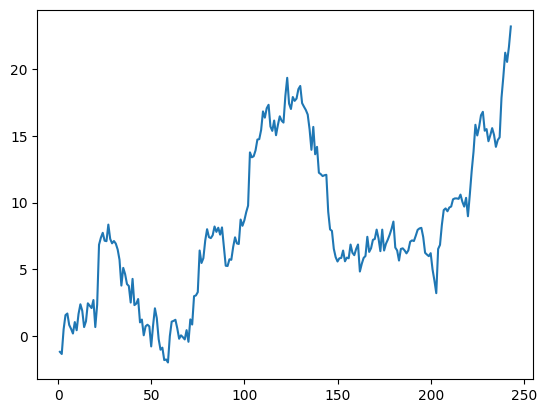

In [ ]:
l = 10
nft[nft.columns[l]].cumsum().plot()
print(nft.columns[l])
print(nft[nft.columns[l]].cumsum().iloc[-1])
#print(nft[nft.columns[l]].cumsum())

In [ ]:
#nft.drop(['ADAENT','ADAPOR', 'BRIIND'	], axis = 1, inplace = True)

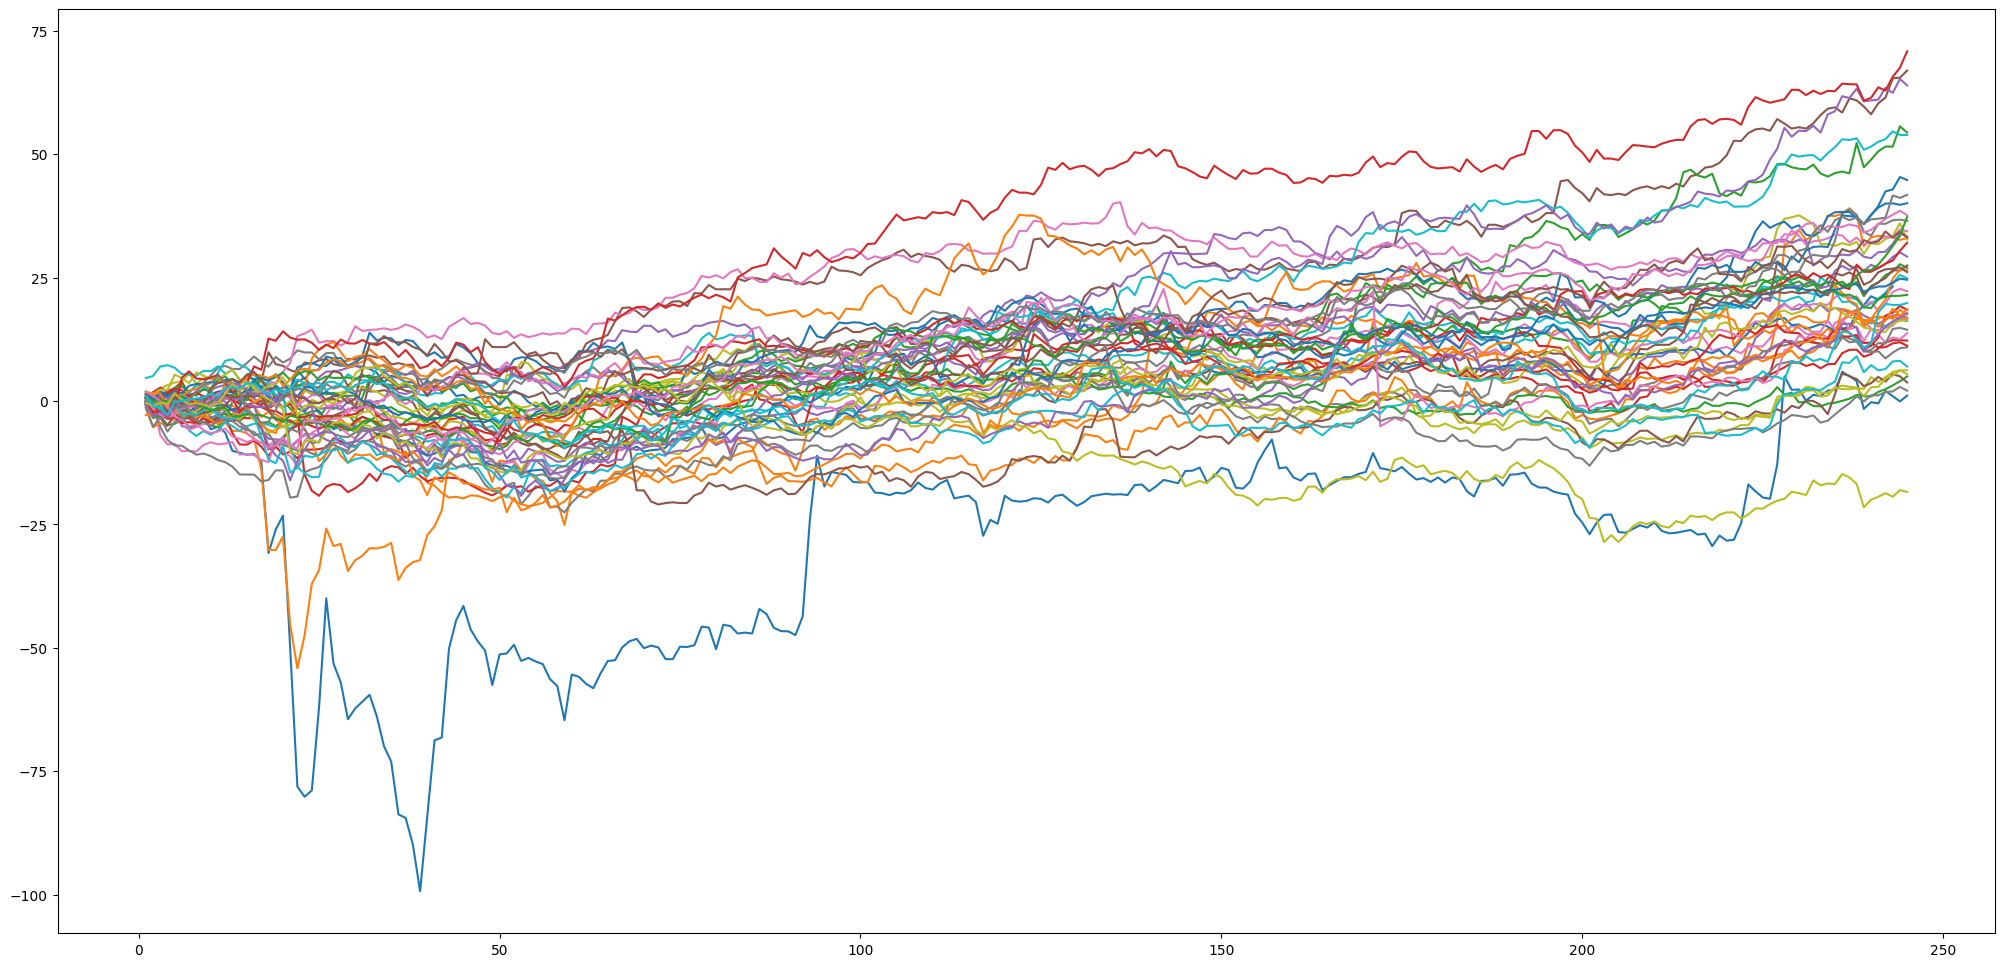

In [ ]:
for i in nft.columns :
  nft[i].cumsum().plot(figsize = (25,12))

In [ ]:
nft_price

ADAENT   ADAPOR   APOHOS   ASIPAI   AXIBAN  BAAUTO    BAJFI   BAFINS  \
1    3830.95   818.00  4495.00  3028.25   962.30  3595.1  6606.25  1562.60   
2    3827.05   807.00  4428.95  3012.00   957.45  3556.0  6562.00  1546.00   
3    3839.00   819.60  4422.00  3004.35   949.55  3628.0  6100.05  1468.85   
4    3824.25   806.10  4376.00  2982.50   941.00  3640.0  5984.00  1430.35   
5    3853.00   816.65  4410.00  2983.00   957.10  3619.0  5993.35  1414.00   
..       ...      ...      ...      ...      ...     ...      ...      ...   
241  2806.00  1028.00  5540.00  3345.00  1087.00  6388.1  7290.60  1675.00   
242  2876.80  1027.00  5626.00  3383.00  1095.10  6463.0  7175.00  1650.95   
243  2846.00  1025.50  5665.40  3400.00  1105.15  6714.0  7249.00  1670.05   
244  2816.15  1019.95  5751.20  3399.50  1105.45  6724.0  7223.95  1685.00   
245  2849.05  1023.50  5708.00  3397.00  1100.10  6820.0  7310.00  1688.00   

     BHAPET   BHAAIR  ...   SUNPHA      TCS   TATGLO  TATMOT  TATSTE   TECMAH  \
1    336.85   817.60  ...  1010.00  3311.35   767.60  393.90  118.45  1023.80   
2    336.30   811.80  ...  1001.00  3313.10   761.65  385.75  115.45  1019.70   
3    342.35   807.10  ...  1014.50  3311.10   764.00  386.90  116.55  1011.65   
4    344.70   795.00  ...  1007.00  3213.90   761.35  382.00  115.65   986.15   
5    346.50   819.10  ...  1016.15  3309.00   767.50  388.95  117.55  1015.25   
..      ...      ...  ...      ...      ...      ...     ...     ...      ...   
241  447.00   989.00  ...  1243.00  3814.00   989.85  725.05  133.40  1272.50   
242  451.90  1000.90  ...  1243.10  3798.10  1007.00  720.25  135.45  1280.00   
243  454.45  1020.05  ...  1253.00  3808.00  1027.00  740.30  137.00  1282.00   
244  466.50  1037.50  ...  1262.80  3798.85  1048.55  754.00  138.05  1285.10   
245  451.00  1030.00  ...  1260.05  3799.00  1089.00  779.10  139.30  1272.80   

      TITIND    ULTCEM    UNIP   WIPRO  
1    2613.60   6993.60  719.80  397.20  
2    2592.00   6994.70  715.10  389.40  
3    2565.20   7007.00  720.30  386.90  
4    2537.00   6982.20  718.05  382.00  
5    2484.65   7028.00  733.70  391.95  
..       ...       ...     ...     ...  
241  3620.00   9999.00  582.30  461.90  
242  3660.05  10020.00  586.55  470.00  
243  3689.00  10469.95  582.40  469.05  
244  3720.00  10418.95  590.20  469.00  
245  3685.90  10482.35  587.80  470.80  

[245 rows x 50 columns]

In [ ]:
from sklearn.decomposition import PCA
n_components = 15

In [ ]:
nft.dropna(inplace = True)
nft_returns = nft.values.copy()
nft_returns

In [ ]:
nft = ( nft - nft.mean() ) / nft.std()
nft

ADAENT    ADAPOR    APOHOS    ASIPAI    AXIBAN    BAAUTO     BAJFI  \
1   -0.063648 -0.208201  0.549938 -0.635235  1.509544  0.216044  0.491225   
2   -0.021206 -0.494911 -1.164649 -0.553362 -0.492074 -0.989716 -0.474649   
3    0.061784  0.476045 -0.195496 -0.287079 -0.766737  1.281032 -4.657541   
4   -0.077810 -0.595947 -0.847755 -0.732999 -0.831162  0.045107 -1.284063   
5    0.149879  0.391659  0.494095 -0.031991  1.402512 -0.617134  0.067799   
..        ...       ...       ...       ...       ...       ...       ...   
239 -1.125673 -2.159068 -2.190046 -1.389492 -1.044015 -1.103953 -1.341243   
240  0.272941  0.566534  1.424847  0.457966 -0.660750 -1.345183 -0.886880   
241 -0.049967  0.037467  0.404698  1.073748 -0.879313  1.415900 -0.882968   
242  0.504921 -0.078118  1.066643  1.022530  0.576422  0.659231 -1.076006   
243 -0.215390 -0.094416  0.437499  0.425661  0.724019  2.637276  0.642447   

       BAFINS    BHAPET    BHAAIR  ...    SUNPHA       TCS    TATGLO  \
1    0.550219  0.527706  0.343608  ...  1.245523  1.299995  0.539717   
2   -0.791965 -0.208365 -0.791983  ... -1.022983 -0.015291 -0.805626   
3   -3.613157  1.151828 -0.664054  ...  1.291761 -0.116101  0.159855   
4   -1.911521  0.380632 -1.566618  ... -0.866091 -2.676260 -0.424056   
5   -0.849958  0.266786  2.877025  ...  0.837014  2.572435  0.604636   
..        ...       ...       ...  ...       ...       ...       ...   
239 -1.492687 -1.760285 -1.749241  ... -1.617140 -0.838664  0.842161   
240 -0.168305  1.413433  0.767194  ...  0.565932  0.474293 -0.092266   
241  0.102058 -0.303903  0.824726  ...  0.319540  0.323360  0.904573   
242 -1.060217  0.664671  1.083920  ... -0.093739 -0.433553  1.428573   
243  0.801966  0.295962  1.780328  ...  0.721012  0.169746  1.654433   

       TATMOT    TATSTE    TECMAH    TITIND    ULTCEM      UNIP     WIPRO  
1   -0.330815 -0.539673  0.839154  1.624269 -0.450473 -0.225093  0.801423  
2   -1.553384 -1.902476 -0.328202 -0.923967 -0.135233 -0.428873 -1.678686  
3    0.018529  0.648775 -0.578105 -1.119281  0.003935  0.603733 -0.593095  
4   -1.020436 -0.613851 -1.690323 -1.180819 -0.456526 -0.174046 -1.105991  
5    1.028711  1.153896  1.824896 -2.088311  0.421223  1.690368  2.073569  
..        ...       ...       ...       ...       ...       ...       ...  
239 -2.358204 -3.588192 -2.077036 -1.402503 -1.249981 -3.490663 -1.415314  
240  0.192091  1.370996  0.395008  0.409317  0.615055  1.208010  0.677424  
241  1.232930  1.065463  1.085510  0.905607 -0.027039  0.505598  5.033357  
242 -0.619051  1.076194  0.307742  0.895286  0.033637  0.605748  1.374538  
243  1.669106  0.788975  0.029467  0.598433  3.754064 -0.469701 -0.231799  

[243 rows x 50 columns]

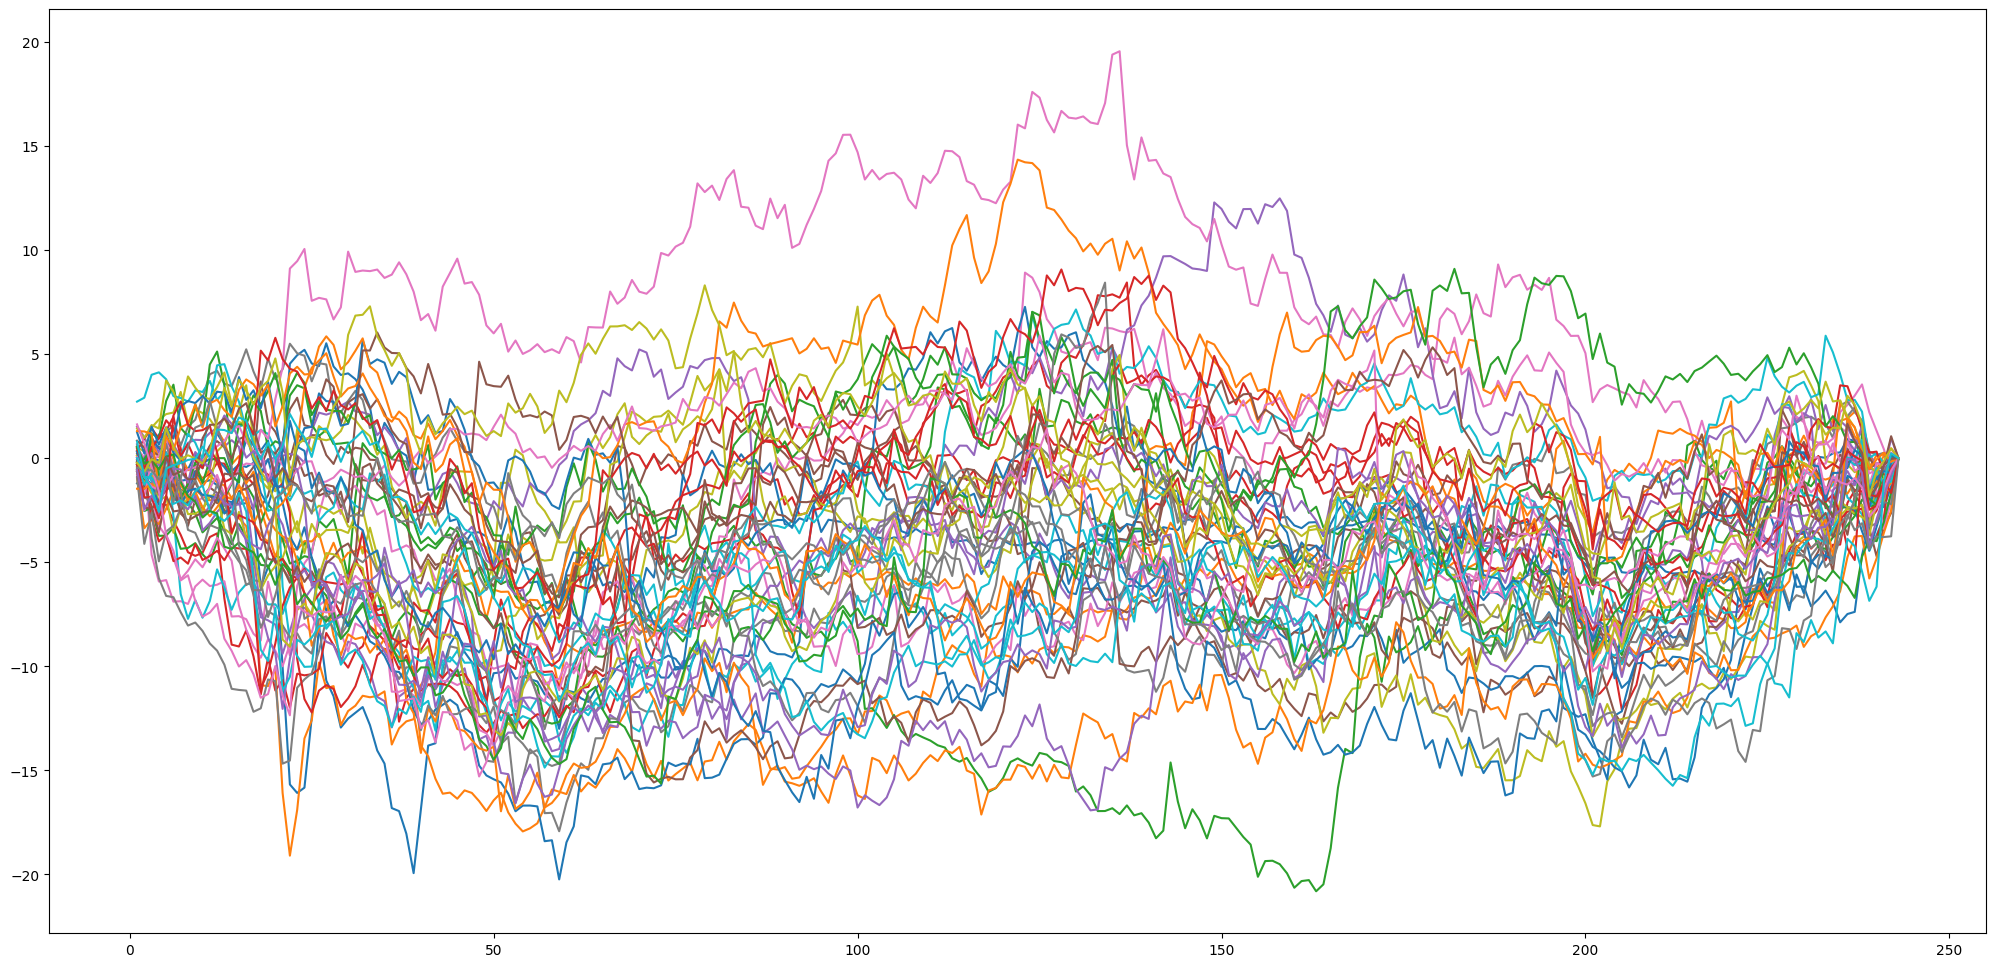

In [ ]:
for i in nft.columns :
  nft[i].cumsum().plot(figsize = (25,12))

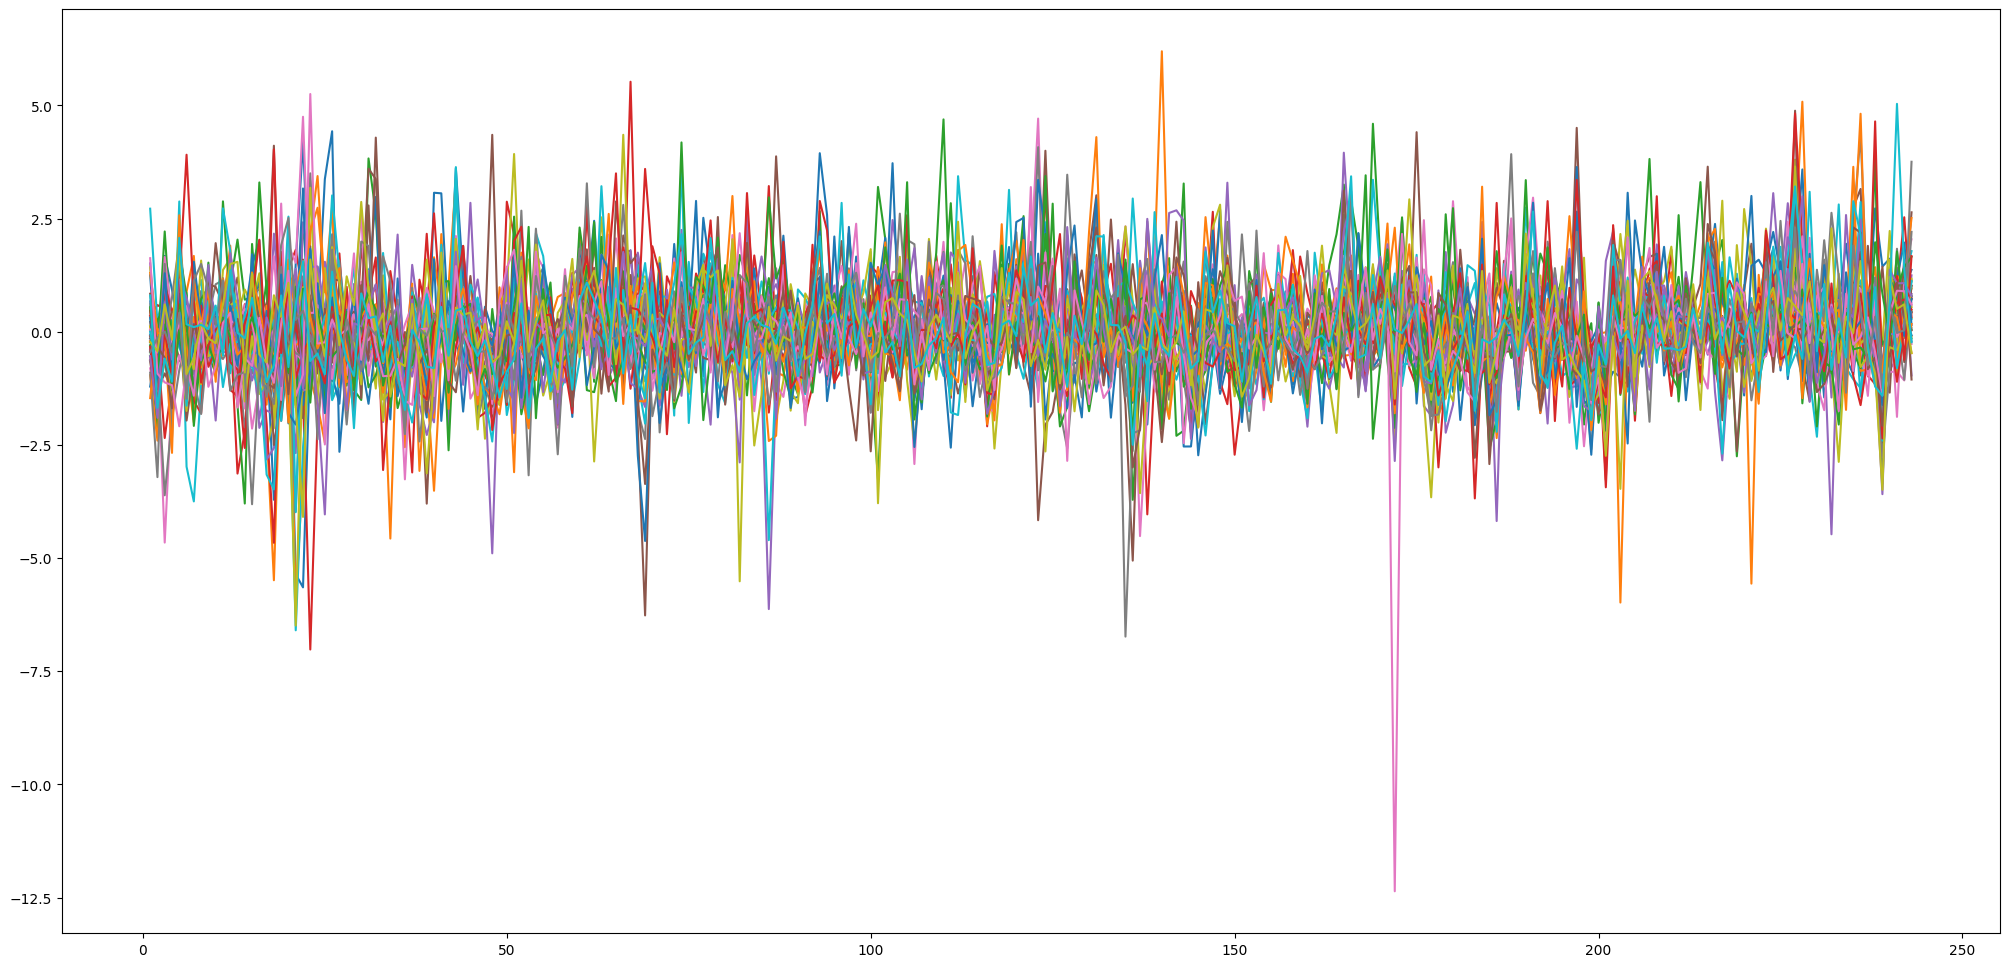

In [ ]:
for i in nft.columns :
  nft[i].plot(figsize = (25,12))

<Axes: >

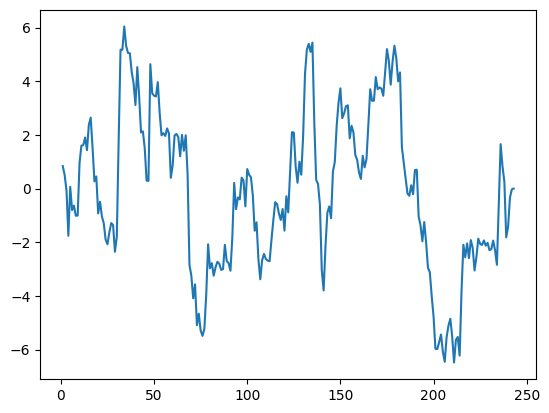

In [ ]:
nft[nft.columns[-5]].cumsum().plot()

In [ ]:
index = m1.close.pct_change()
(( index - index.mean() ) / index.std()).cumsum().plot()
index.cumsum().plot(figsize = (12,6))

In [ ]:
pca = PCA(n_components=n_components)
pca.fit(  nft.values )

PCA(n_components=15)

In [ ]:
evr = pca.explained_variance_ratio_
evr

array([0.20100004, 0.06498496, 0.0493066 , 0.04238761, 0.04144053,
       0.03562028, 0.03045107, 0.02990327, 0.02742551, 0.02470284,
       0.02278879, 0.02236323, 0.02140069, 0.02010813, 0.01954625])

Proportion of variance explained by the principal eigenvector: 0.20


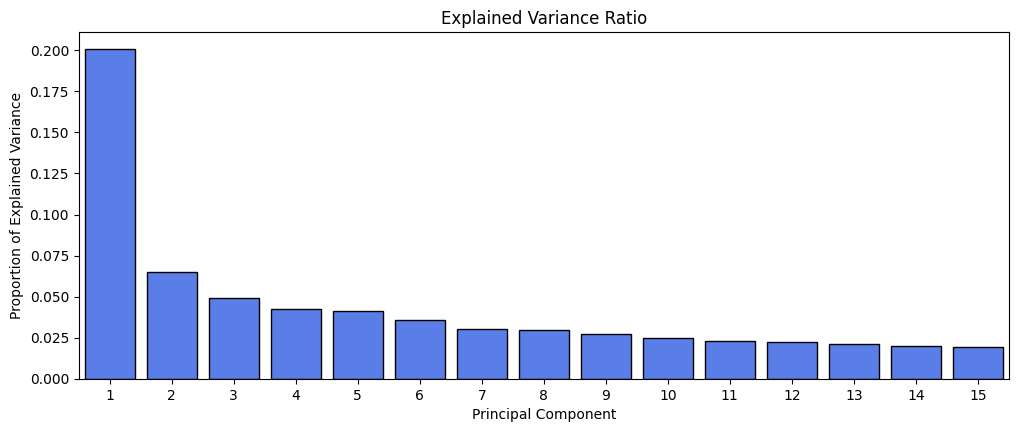

In [ ]:
import seaborn as sns
print(f'Proportion of variance explained by the principal eigenvector: {evr[0]:,.2f}')

plt.figure(figsize=(12, 4.5))
sns.barplot(x=np.arange(1, len(evr)+1), y=evr, color='#4273FF', edgecolor='k')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component'); plt.ylabel('Proportion of Explained Variance');

In [ ]:
eigenvectors = pca.components_
eigenvectors[0]

array([-0.12123824, -0.14718781, -0.12685611, -0.10077967, -0.149958  ,
       -0.10928431, -0.13615545, -0.16658284, -0.11252773, -0.14223194,
       -0.03256508, -0.06485435, -0.1340044 , -0.07038992, -0.08998155,
       -0.14182853, -0.19612107, -0.15498226, -0.1597301 , -0.11415648,
       -0.1392997 , -0.18041864, -0.10075401, -0.15822181, -0.15487421,
       -0.15736933, -0.10602534, -0.18865854, -0.16608056, -0.13265059,
       -0.14906041, -0.1551906 , -0.13473828, -0.09882221, -0.14606256,
       -0.11932586, -0.06974787, -0.16539155, -0.15280491, -0.19285368,
       -0.11158548, -0.15751396, -0.12684383, -0.1489492 , -0.19307728,
       -0.14055943, -0.13600857, -0.13587142, -0.1871171 , -0.17706318])

In [ ]:
sstr = ''
for i in range (len(nifty_cons)) :
  sstr = sstr  + '  ' +  str(int(np.round(list(eigenvectors[0])[i]*100))) +  '*' + str(nifty_cons[i])

sstr

'  -12*ADAENT  -15*ADAPOR  -13*APOHOS  -10*ASIPAI  -15*AXIBAN  -11*BAAUTO  -14*BAJFI  -17*BAFINS  -11*BHAPET  -14*BHAAIR  -3*BRIIND  -6*CIPLA  -13*COALIN  -7*DIVLAB  -9*DRREDD  -14*EICMOT  -20*GRASIM  -15*HCLTEC  -16*HDFBAN  -11*HDFSTA  -14*HERHON  -18*HINDAL  -10*HINLEV  -16*ICIBAN  -15*INDBA  -16*INFTEC  -11*ITC  -19*JSWSTE  -17*KOTMAH  -13*LARTOU  -15*LTINFO  -16*MAHFIN  -13*MARUTI  -10*NESIND  -15*NTPC  -12*ONGC  -7*POWGRI  -17*RELIND  -15*SBILIF  -19*STABAN  -11*SUNPHA  -16*TCS  -13*TATGLO  -15*TATMOT  -19*TATSTE  -14*TECMAH  -14*TITIND  -14*ULTCEM  -19*UNIP  -18*WIPRO'

-12  ADAENT  -14 ADAPOR  -13APOHOS   -10 ASIPAI  -15 AXIBAN  
-11 BAAUTO   -13 BAJFI   -16 BAFINS  -11 BHAPET  -14 BHAAIR  
-8 BRIIND    -7 CIPLA    -13 COALIN  -7 DIVLAB   -9 DRREDD  
-14 EICMOT   -20 GRASIM  -16 HCLTEC  -16 HDFBAN  -11 HDFSTA
-14 HERHON   -18 HINDAL  -10 HINLEV  -16 ICIBAN  -16 INDBA  
-17 INFTEC   -11 ITC     -19 JSWSTE  -17 KOTMAH  -13 LARTOU
-15 LTINFO   -15 MAHFIN  -13 MARUTI  -11 NESIND  -14 NTPC  
-12 ONGC     -7 POWGRI   -17 RELIND  -15 SBILIF  -19 STABAN  
-11 SUNPHA   -16 TCS     -12 TATGLO  -15 TATMOT  -19 TATSTE
 -14 TECMAH  -14 TITIND  -13 ULTCEM  -19 UNIP  -18 WIPRO









<BarContainer object of 50 artists>

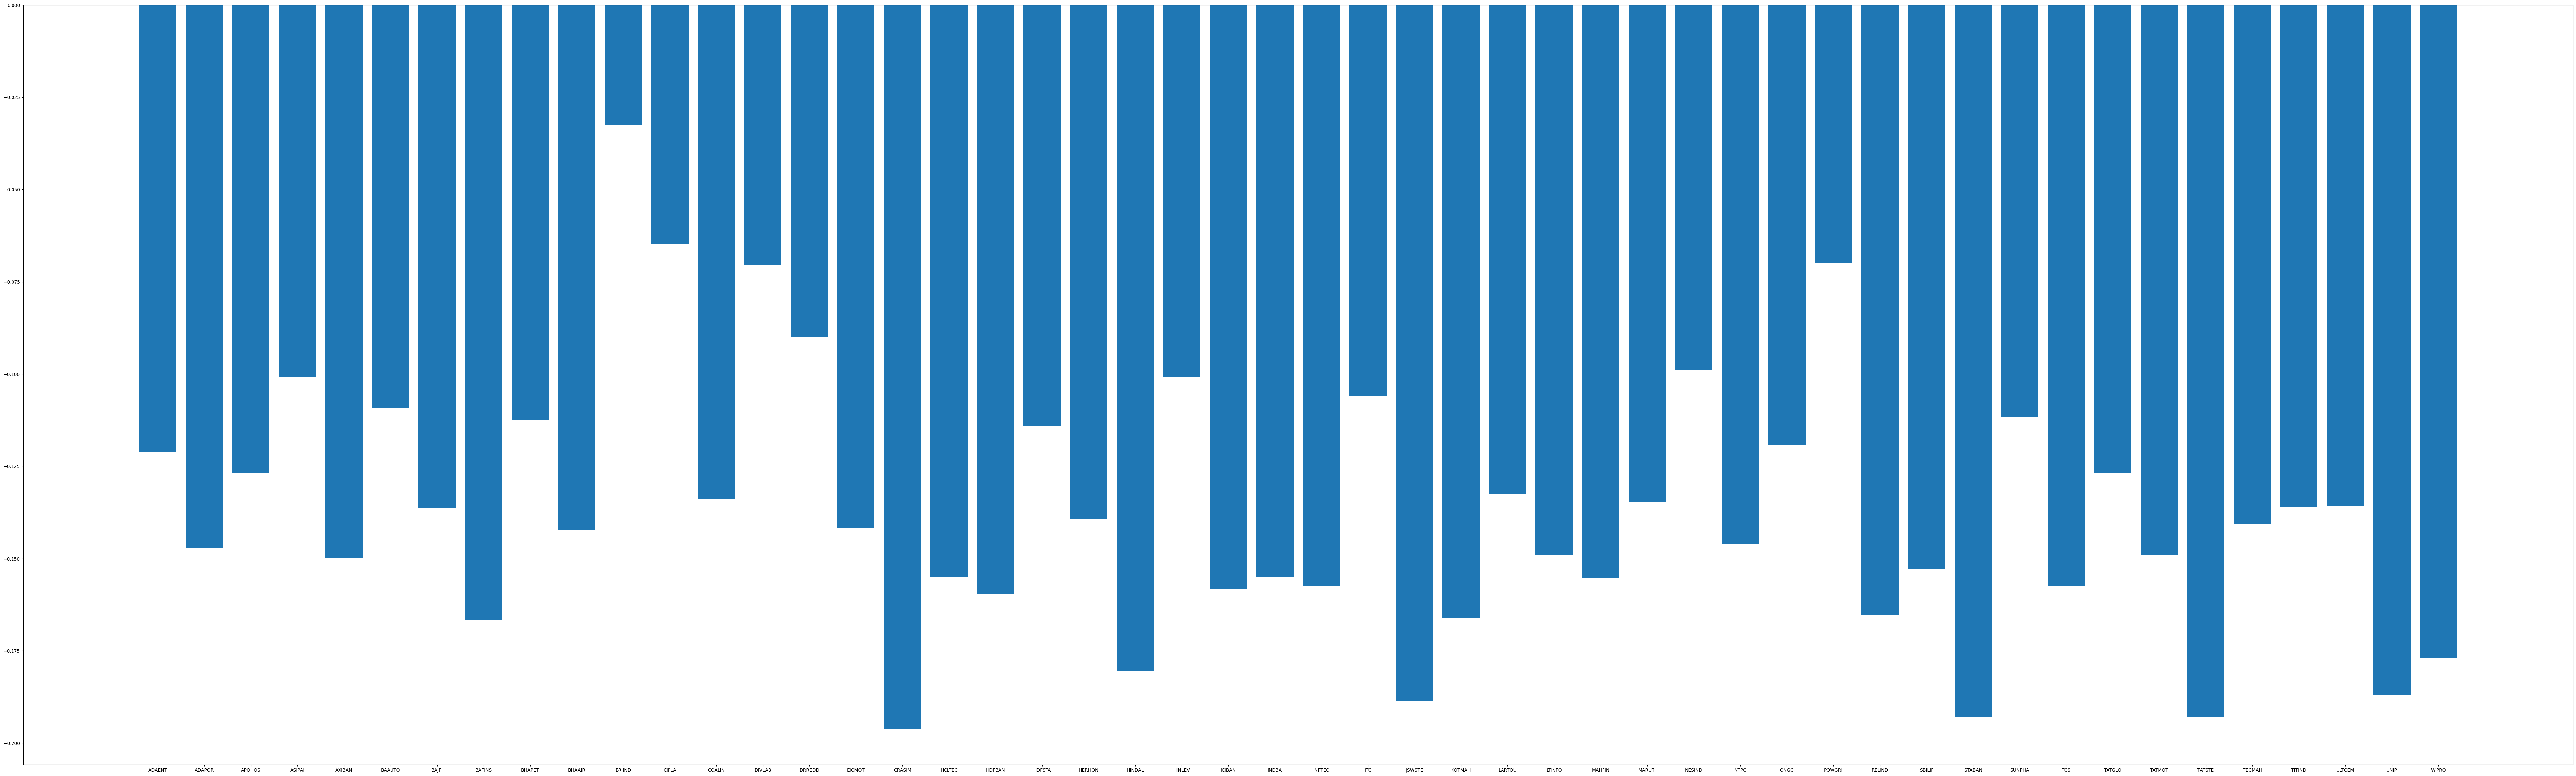

In [ ]:
eigenportfolio = [[0]*50]*15
for i in range (len(eigenvectors)) :
  eigenportfolio[i] = eigenvectors[i]/pd.DataFrame(nft_returns).std()

fig = plt.figure(figsize =(100, 30))
plt.bar(nifty_cons , list(eigenvectors[0]) )


<BarContainer object of 50 artists>

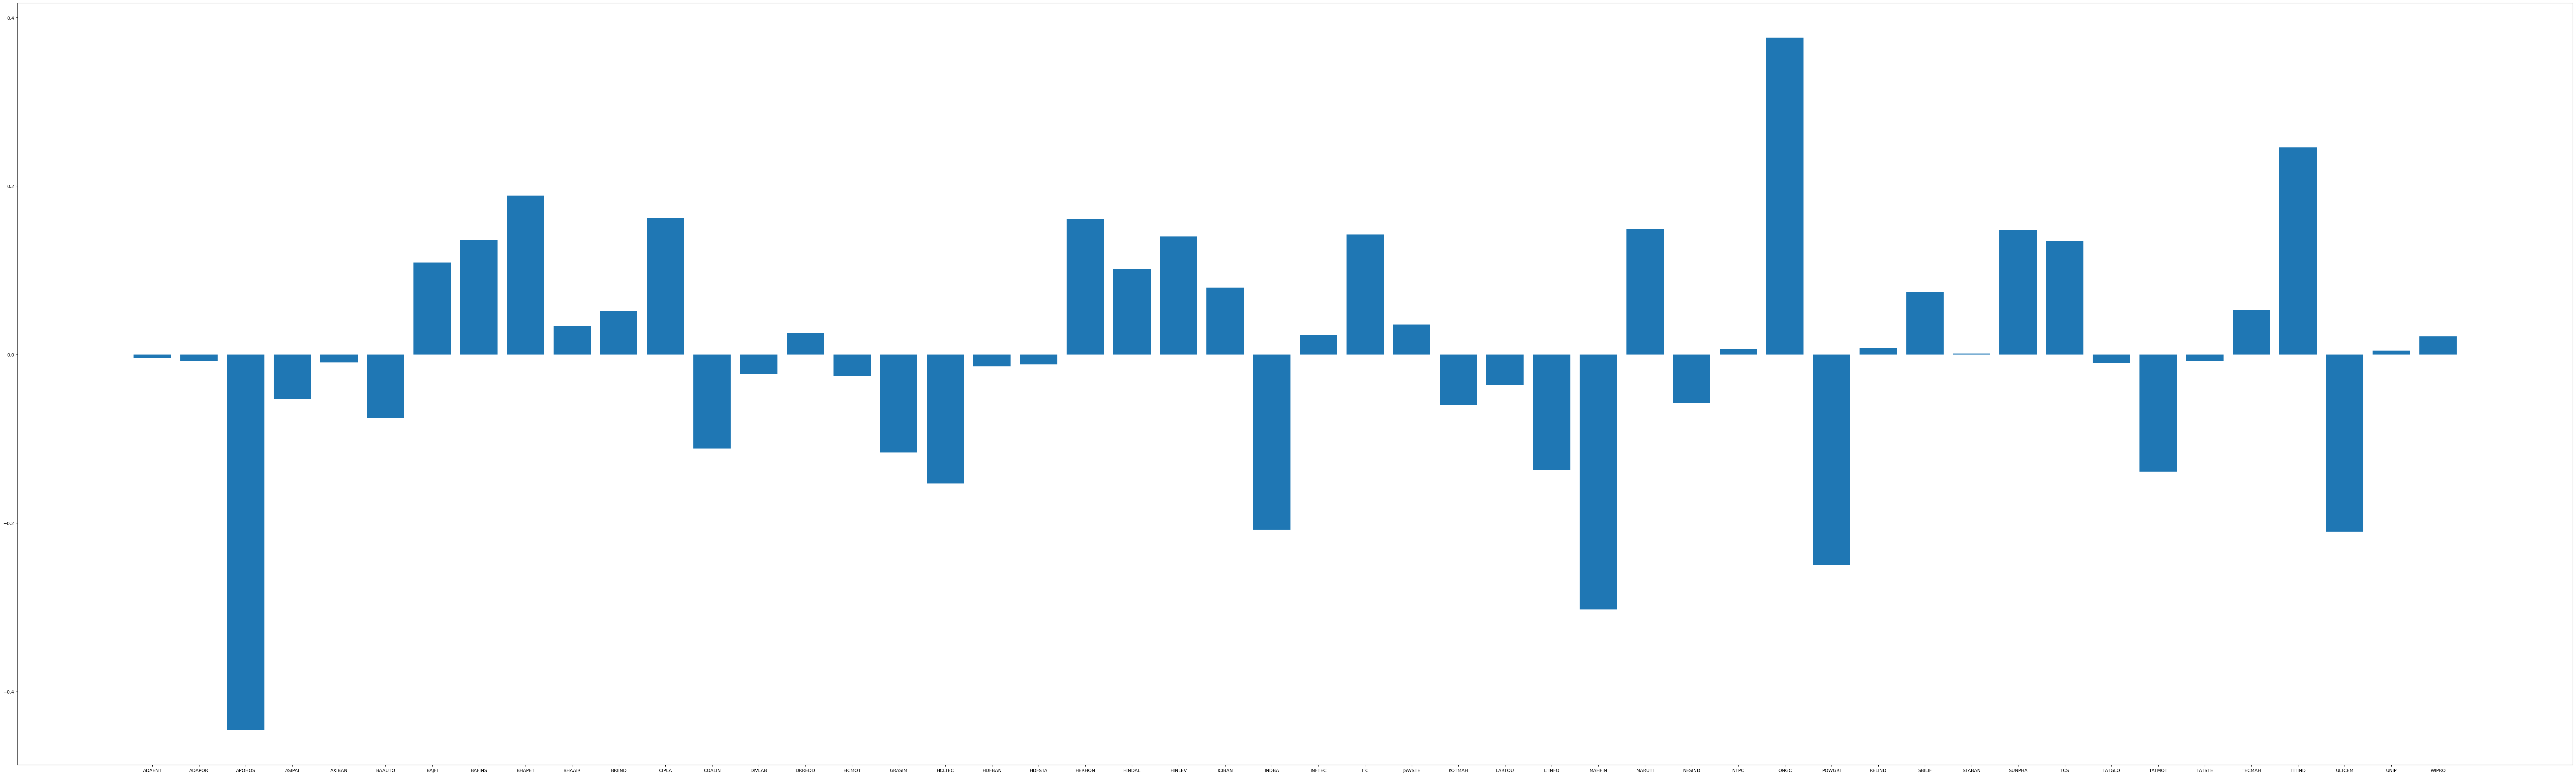

In [ ]:
fig = plt.figure(figsize =(100, 30))
plt.bar(nifty_cons , list(eigenvectors[-1]) )

In [ ]:
snp_prices = nft_returns
eigenportfolios = eigenportfolio

def get_eigenportfolio_returns(eigenportfolios, snp_prices):
    ep_returns =  ((eigenportfolios @ snp_prices.T).T).pct_change()[1:]
    col_map = {col: f"EP{col+1}" for col in ep_returns.columns}
    return ep_returns.rename(columns=col_map).rename(columns={'EP1': 'PrEP'})

eigenportfolio_returns = get_eigenportfolio_returns(eigenportfolios, snp_prices)
eigenportfolio_returns.head()

eigenportfolios[0]

0    -0.024300
1    -0.049177
2    -0.093672
3    -0.094951
4    -0.128269
5    -0.079733
6    -0.089408
7    -0.119645
8    -0.078001
9    -0.139501
10   -0.031126
11   -0.046482
12   -0.087739
13   -0.040835
14   -0.077263
15   -0.094942
16   -0.176340
17   -0.122634
18   -0.148659
19   -0.067302
20   -0.098060
21   -0.110304
22   -0.106780
23   -0.163844
24   -0.100407
25   -0.108683
26   -0.095332
27   -0.145271
28   -0.152362
29   -0.108652
30   -0.098589
31   -0.078545
32   -0.136318
33   -0.095297
34   -0.109272
35   -0.090871
36   -0.031414
37   -0.138627
38   -0.113842
39   -0.142104
40   -0.115322
41   -0.140254
42   -0.113008
43   -0.098909
44   -0.141325
45   -0.090304
46   -0.128018
47   -0.118094
48   -0.140000
49   -0.145429
dtype: float64

In [ ]:
sstr = ''
for i in range (len(nifty_cons)) :
  sstr = sstr  + '  ' +  str(int(np.round(list(eigenportfolios[0])[i]*100))) +  '*' + str(nifty_cons[i])

In [ ]:
sstr

'  -2*ADAENT  -5*ADAPOR  -9*APOHOS  -9*ASIPAI  -13*AXIBAN  -8*BAAUTO  -9*BAJFI  -12*BAFINS  -8*BHAPET  -14*BHAAIR  -3*BRIIND  -5*CIPLA  -9*COALIN  -4*DIVLAB  -8*DRREDD  -9*EICMOT  -18*GRASIM  -12*HCLTEC  -15*HDFBAN  -7*HDFSTA  -10*HERHON  -11*HINDAL  -11*HINLEV  -16*ICIBAN  -10*INDBA  -11*INFTEC  -10*ITC  -15*JSWSTE  -15*KOTMAH  -11*LARTOU  -10*LTINFO  -8*MAHFIN  -14*MARUTI  -10*NESIND  -11*NTPC  -9*ONGC  -3*POWGRI  -14*RELIND  -11*SBILIF  -14*STABAN  -12*SUNPHA  -14*TCS  -11*TATGLO  -10*TATMOT  -14*TATSTE  -9*TECMAH  -13*TITIND  -12*ULTCEM  -14*UNIP  -15*WIPRO'

In [ ]:
df_ep = nft_price@np.array(eigenportfolios).T
df_ep

0           1            2            3             4   \
1   -11763.745884  353.890843   894.550733 -4074.192481  11611.141520   
2   -11683.369414  357.456832   897.928509 -4066.726618  11536.042957   
3   -11690.555375  329.987281  1077.112526 -4094.666362  11661.269393   
4   -11607.272165  357.300594  1128.377926 -4063.363540  11689.787122   
5   -11711.966788  286.430959  1127.657230 -4077.328641  11778.826977   
..            ...         ...          ...          ...           ...   
241 -14610.916966  385.587119  1938.405061 -5397.809864  14451.069178   
242 -14708.318035  391.098992  2020.161884 -5455.076425  14591.565915   
243 -14883.588559  428.466583  2061.020820 -5492.973293  14706.471870   
244           NaN         NaN          NaN          NaN           NaN   
245           NaN         NaN          NaN          NaN           NaN   

             5           6            7            8            9   \
1    -11.696375   29.260806  1464.932292 -2461.689191  2152.674893   
2     -0.034106   43.922580  1439.226647 -2463.947037  2114.901572   
3    -22.710443  -75.058331  1400.438693 -2540.401490  1979.203241   
4    -44.012912 -123.997181  1427.298064 -2563.047362  1956.084008   
5    -54.424305 -180.346780  1434.632803 -2559.955419  1941.691471   
..          ...         ...          ...          ...          ...   
241  411.527025  542.142416  1511.511018 -3429.912105  3001.954855   
242  391.386832  485.548500  1487.626224 -3481.023672  3025.834476   
243  493.433769  527.594453  1599.096811 -3563.537645  3097.508762   
244         NaN         NaN          NaN          NaN          NaN   
245         NaN         NaN          NaN          NaN          NaN   

             10           11           12           13           14  
1      1.858468  1620.081925 -5168.960860 -3290.312999  -889.326339  
2    -39.333849  1607.637481 -5124.845354 -3295.192275  -854.827740  
3    -39.796979  1672.626748 -5214.694354 -3331.523194  -887.646252  
4      8.587370  1675.876900 -5244.378268 -3359.278986  -908.075631  
5     20.909000  1667.136449 -5302.407891 -3383.766778  -940.077725  
..          ...          ...          ...          ...          ...  
241 -455.768971  3434.160914 -6898.808553 -3847.311106 -1682.977834  
242 -483.449638  3449.017467 -6951.423422 -3883.640137 -1721.520676  
243 -595.605175  3634.727890 -6992.799225 -3956.190565 -1823.848561  
244         NaN          NaN          NaN          NaN          NaN  
245         NaN          NaN          NaN          NaN          NaN  

[245 rows x 15 columns]

In [ ]:
df_ep_returns = df_ep.pct_change()*100
df_ep_returns.dropna(inplace = True)
df_ep_returns

0          1          2         3         4             5   \
2   -0.683256   1.007653   0.377595 -0.183248 -0.646780    -99.708401   
3    0.061506  -7.684719  19.955265  0.687033  1.085523  66486.900582   
4   -0.712397   8.277081   4.759521 -0.764478  0.244551     93.800320   
5    0.901974 -19.834738  -0.063870  0.343683  0.761689     23.655316   
6   -0.795982  -9.077188   2.345370 -0.209816 -0.245388     29.208867   
..        ...        ...        ...       ...       ...           ...   
241  0.696993  -9.704842   4.783240  1.989432  0.712166     -1.665572   
242  0.666632   1.429475   4.217737  1.060922  0.972224     -4.894015   
243  1.191642   9.554510   2.022558  0.694708  0.787482     26.073166   
244  0.000000   0.000000   0.000000  0.000000  0.000000      0.000000   
245  0.000000   0.000000   0.000000  0.000000  0.000000      0.000000   

             6         7         8         9            10        11  \
2     50.107211 -1.754733  0.091719 -1.754716 -2216.466330 -0.768137   
3   -270.887799 -2.695055  3.102926 -6.416295     1.177435  4.042532   
4     65.201091  1.917926  0.891429 -1.168108  -121.577944  0.194314   
5     45.444258  0.513890 -0.120635 -0.735783   143.485490 -0.521545   
6      0.338577  0.194191 -1.093723 -1.137458    63.654117 -3.764219   
..          ...       ...       ...       ...          ...       ...   
241   -0.126474 -6.156432  1.894506  0.160744     1.589906  1.152041   
242  -10.438939 -1.580193  1.490171  0.795469     6.073399  0.432611   
243    8.659476  7.493185  2.370394  2.368744    23.199011  5.384444   
244    0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   
245    0.000000  0.000000  0.000000  0.000000     0.000000  0.000000   

           12        13        14  
2   -0.853470  0.148292 -3.879183  
3    1.753204  1.102543  3.839196  
4    0.569236  0.833126  2.301523  
5    1.106511  0.728960  3.524166  
6   -0.343824 -1.536193  2.296282  
..        ...       ...       ...  
241  0.907690  0.148544 -0.167617  
242  0.762666  0.944271  2.290157  
243  0.595213  1.868104  5.944040  
244  0.000000  0.000000  0.000000  
245  0.000000  0.000000  0.000000  

[244 rows x 15 columns]

<Axes: >

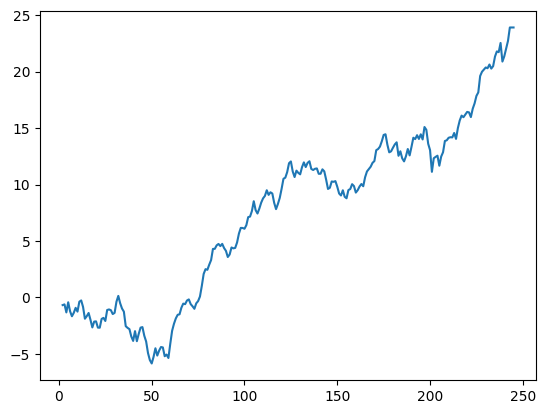

In [ ]:
df_ep_returns[df_ep_returns.columns[0]].cumsum().plot()

<Axes: xlabel='datetime'>

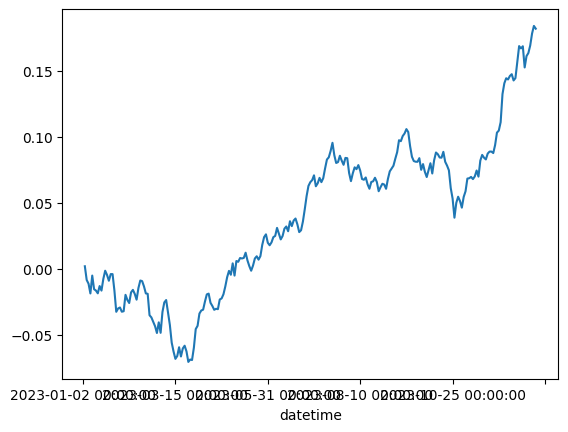

In [ ]:
m1.close.pct_change().cumsum().plot()

In [ ]:
#PSEUDO CODE
m1 = m1.close.pct_change()
m1.dropna(inplace = True)
m1 = m1[1:]
(df_ep_returns[0]/-df_ep_returns[0][0]).cumsum().plot()
(m1/-m1[0]).cumsum().plot(figsize = (12,6))

m1 = m
m1 = m1.close.pct_change()
m1.dropna(inplace = True)
m1 = m1[1:]


from scipy import stats
slope, intercept, r, p, std_err = stats.linregress((df_ep_returns[0]/-df_ep_returns[0][0]).cumsum(), (m1/-m1[0]).cumsum())

slope, intercept, r, p, std_err

( (m1/-m1[0]).cumsum() - 0.15*(df_ep_returns[0]/-df_ep_returns[0][0]).cumsum()).plot(figsize = (18,6))

KeyError: 0

# BANKING INDEX **PCA**

In [ ]:
n = breeze.get_historical_data_v2(interval="1day",
                            from_date= "2021-01-01T07:00:00.000Z",
                            to_date= "2022-12-31T07:00:00.000Z",
                            stock_code="CNXBAN",
                            exchange_code="NSE",
                            product_type="cash")

m1 =pd.DataFrame(n['Success'])
m1.index = m1.datetime
m1.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' }  , inplace = True)
m1.rename( {'datetime' : 'date'} , inplace = True)
m1

close      high       low      open
datetime                                                   
2021-01-04 00:00:00  31275.15  31489.60  30893.65  31485.15
2021-01-05 00:00:00  31705.60  31767.65  30935.55  31041.10
2021-01-06 00:00:00  31739.40  31982.30  31548.15  31839.95
2021-01-07 00:00:00  31971.50  32177.40  31911.50  32129.80
2021-01-08 00:00:00  32078.15  32298.05  32002.95  32298.05
...                       ...       ...       ...       ...
2022-12-26 00:00:00  42630.15  42846.15  41569.45  41716.35
2022-12-27 00:00:00  42859.50  42927.20  42394.15  42827.75
2022-12-28 00:00:00  42827.70  43034.95  42694.85  42733.60
2022-12-29 00:00:00  43252.35  43498.05  42489.80  42684.90
2022-12-30 00:00:00  42986.45  43422.95  42833.10  43401.70

[496 rows x 4 columns]

In [ ]:
bank_cons = ['HDFBAN', 'ICIBAN', 'AXIBAN', 'KOTMAH', 'STABAN', 'INDBA', 'BANBAR', 'FEDBAN', 'AUSMA', 'IDFBAN', 'PUNBAN', 'BANBAN']
bank_cons

['HDFBAN',
 'ICIBAN',
 'AXIBAN',
 'KOTMAH',
 'STABAN',
 'INDBA',
 'BANBAR',
 'FEDBAN',
 'AUSMA',
 'IDFBAN',
 'PUNBAN',
 'BANBAN']

In [ ]:
nft = pd.DataFrame()
nft_price = pd.DataFrame()
start = "2021-01-01T07:00:00.000Z"
stop =  "2022-12-31T07:00:00.000Z"
for i in range (len(bank_cons)) :
  print( bank_cons[i])
  n = breeze.get_historical_data_v2(interval="1day",
                            from_date= start,
                            to_date= stop,
                            stock_code=  bank_cons[i] ,
                            exchange_code="NSE",
                            product_type="cash")

  m =pd.DataFrame(n['Success'])
  m.index = m.datetime
  m.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' }  , inplace = True)
  m.rename( {'datetime' : 'date'} , inplace = True)
  #print(i)
  #print(nifty_cons[i])
  #print(m[m.index.duplicated()])
  #print(len(m))
  m.reset_index(inplace = True)
  nft[bank_cons[i]] =m.close.pct_change()[1:]*100
  nft_price[bank_cons[i]] =m.close[1:]

HDFBAN
ICIBAN
AXIBAN
KOTMAH
STABAN
INDBA
BANBAR
FEDBAN
AUSMA
IDFBAN
PUNBAN
BANBAN


In [ ]:
nft

HDFBAN    ICIBAN    AXIBAN    KOTMAH    STABAN     INDBA    BANBAR  \
1    0.755650  1.043822  6.363054 -0.295083  0.249066  2.650777 -0.303951   
2   -0.431065  1.758958 -1.535104  0.543437  1.171251  0.075951 -0.152439   
3   -0.302700 -1.024328  2.575468 -0.913520  0.929661  3.220036  0.992366   
4    1.087379  0.175568  0.238415  0.937308 -0.590893 -1.286697 -0.907029   
5    1.383020  0.488885 -0.854764 -1.651697 -1.223776 -1.138540 -1.983219   
..        ...       ...       ...       ...       ...       ...       ...   
490  1.904315  1.661167  2.437679 -0.327013  4.187751  4.020560  4.761905   
491  0.101261  0.800224  0.376871  0.405282  0.803885  0.670017  0.282326   
492 -0.159402 -0.188753 -0.804548 -0.043934 -0.149526  0.698835  2.364865   
493  0.785999  1.012292  1.665405 -0.005494  1.797005  1.714309  2.722772   
494 -0.688479 -1.662904 -0.675460  0.329670  0.400458 -0.897535 -0.562249   

       FEDBAN     AUSMA     IDFBAN    PUNBAN    BANBAN  
1    2.480510  0.158506   2.849741  0.140647  1.221662  
2    0.553250  0.553891   4.282116 -1.123596 -1.455767  
3    4.057772 -0.174245  10.628019  0.710227  2.474747  
4    0.132188  0.630631  -3.056769 -0.141044  3.351405  
5   -1.254125  0.654655   0.112613 -1.412429 -2.622794  
..        ...       ...        ...       ...       ...  
490  6.344042  1.865469   5.000000  7.645875  2.858399  
491  1.682600  0.813070   0.539084  1.308411  1.303976  
492  0.526514 -0.067837  -0.178731  1.291513 -1.667018  
493  2.992892  0.316790   2.596240  0.910747  1.287554  
494  1.343988 -1.511278   2.617801  1.895307 -0.741525  

[494 rows x 12 columns]

In [ ]:
from sklearn.decomposition import PCA
n_components = 4

nft = ( nft - nft.mean() ) / nft.std()
nft

HDFBAN    ICIBAN    AXIBAN    KOTMAH    STABAN     INDBA    BANBAR  \
1    0.454455  0.535031  3.342396 -0.177425  0.037392  1.076912 -0.202294   
2   -0.299953  0.949071 -0.871853  0.328857  0.514950 -0.005998 -0.146670   
3   -0.218350 -0.662360  1.321440 -0.550826  0.389842  1.316329  0.273623   
4    0.665339  0.032341  0.074450  0.566670 -0.397585 -0.579095 -0.423702   
5    0.853282  0.213741 -0.508842 -0.996524 -0.725327 -0.516783 -0.818804   
..        ...       ...       ...       ...       ...       ...       ...   
490  1.184676  0.892453  1.247919 -0.196704  2.077061  1.653010  1.657533   
491  0.038453  0.393996  0.148326  0.245443  0.324708  0.243852  0.012946   
492 -0.127254 -0.178589 -0.482048 -0.025786 -0.169021  0.255973  0.777508   
493  0.473749  0.516776  0.835854 -0.002577  0.839000  0.683056  0.908907   
494 -0.463595 -1.032074 -0.413170  0.199789  0.115791 -0.415422 -0.297123   

       FEDBAN     AUSMA    IDFBAN    PUNBAN    BANBAN  
1    1.072780  0.007653  1.089148  0.005090  0.524861  
2    0.181264  0.072842  1.659909 -0.482695 -0.558144  
3    1.802394 -0.047210  4.188574  0.224853  1.031726  
4   -0.013513  0.085495 -1.264430 -0.103595  1.386329  
5   -0.654797  0.089456 -0.001521 -0.594137 -1.030200  
..        ...       ...       ...       ...       ...  
490  2.859983  0.289090  1.945966  2.900850  1.186911  
491  0.703681  0.115575  0.168416  0.455652  0.558156  
492  0.168896 -0.029666 -0.117613  0.449132 -0.643594  
493  1.309799  0.033750  0.988135  0.302220  0.551513  
494  0.547045 -0.267654  0.996727  0.682095 -0.269237  

[494 rows x 12 columns]

In [ ]:
pca = PCA(n_components=n_components)
pca.fit(  nft.values )

PCA(n_components=4)

In [ ]:
nft_returns = nft.values.copy()
evr = pca.explained_variance_ratio_
evr

array([0.50815074, 0.09702286, 0.07929528, 0.05646404])

Proportion of variance explained by the principal eigenvector: 0.51


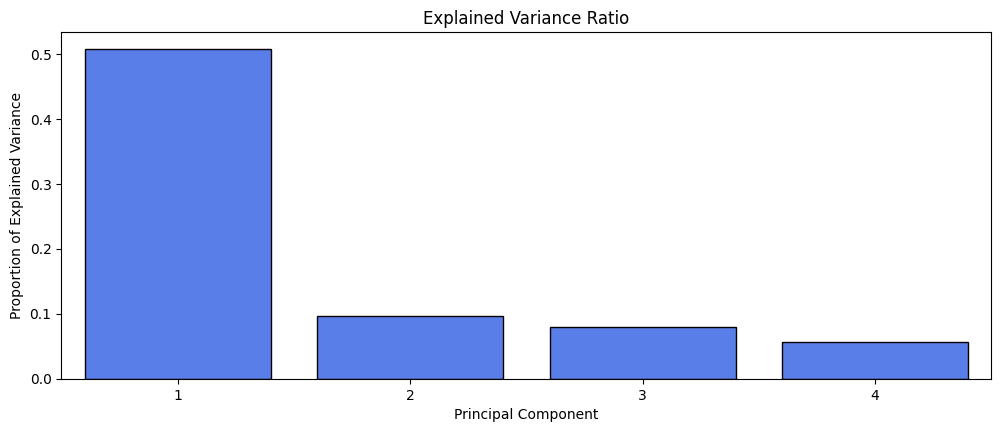

In [ ]:
import seaborn as sns
print(f'Proportion of variance explained by the principal eigenvector: {evr[0]:,.2f}')

plt.figure(figsize=(12, 4.5))
sns.barplot(x=np.arange(1, len(evr)+1), y=evr, color='#4273FF', edgecolor='k')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component'); plt.ylabel('Proportion of Explained Variance');

In [ ]:
eigenvectors = pca.components_
list(eigenvectors[0])

[0.2629085211985483,
 0.31091892173444313,
 0.31204184871485074,
 0.26798361416893324,
 0.3357797673986386,
 0.304859745231298,
 0.308054890491689,
 0.33308934469818974,
 0.0989282609767046,
 0.2919751781482159,
 0.3013897070194253,
 0.26003325987333725]

In [ ]:
#eigenportfolio = [[0]*12]*4
#for i in range (len(eigenvectors)) :
#  eigenportfolio[i] = eigenvectors[i]/pd.DataFrame(nft_returns).std()

eigenportfolio = [[0]*12]*4
for i in range (len(eigenvectors)) :
  eigenportfolio[i] = eigenvectors[i]/nft_price.std()


In [ ]:
nft_price.std()

HDFBAN     86.260740
ICIBAN    105.273733
AXIBAN     68.823900
KOTMAH    102.065177
STABAN     75.648402
INDBA     112.409530
BANBAR     28.750533
FEDBAN     17.355288
AUSMA     216.353444
IDFBAN      8.115427
PUNBAN      5.547859
BANBAN     34.263702
dtype: float64

<BarContainer object of 12 artists>

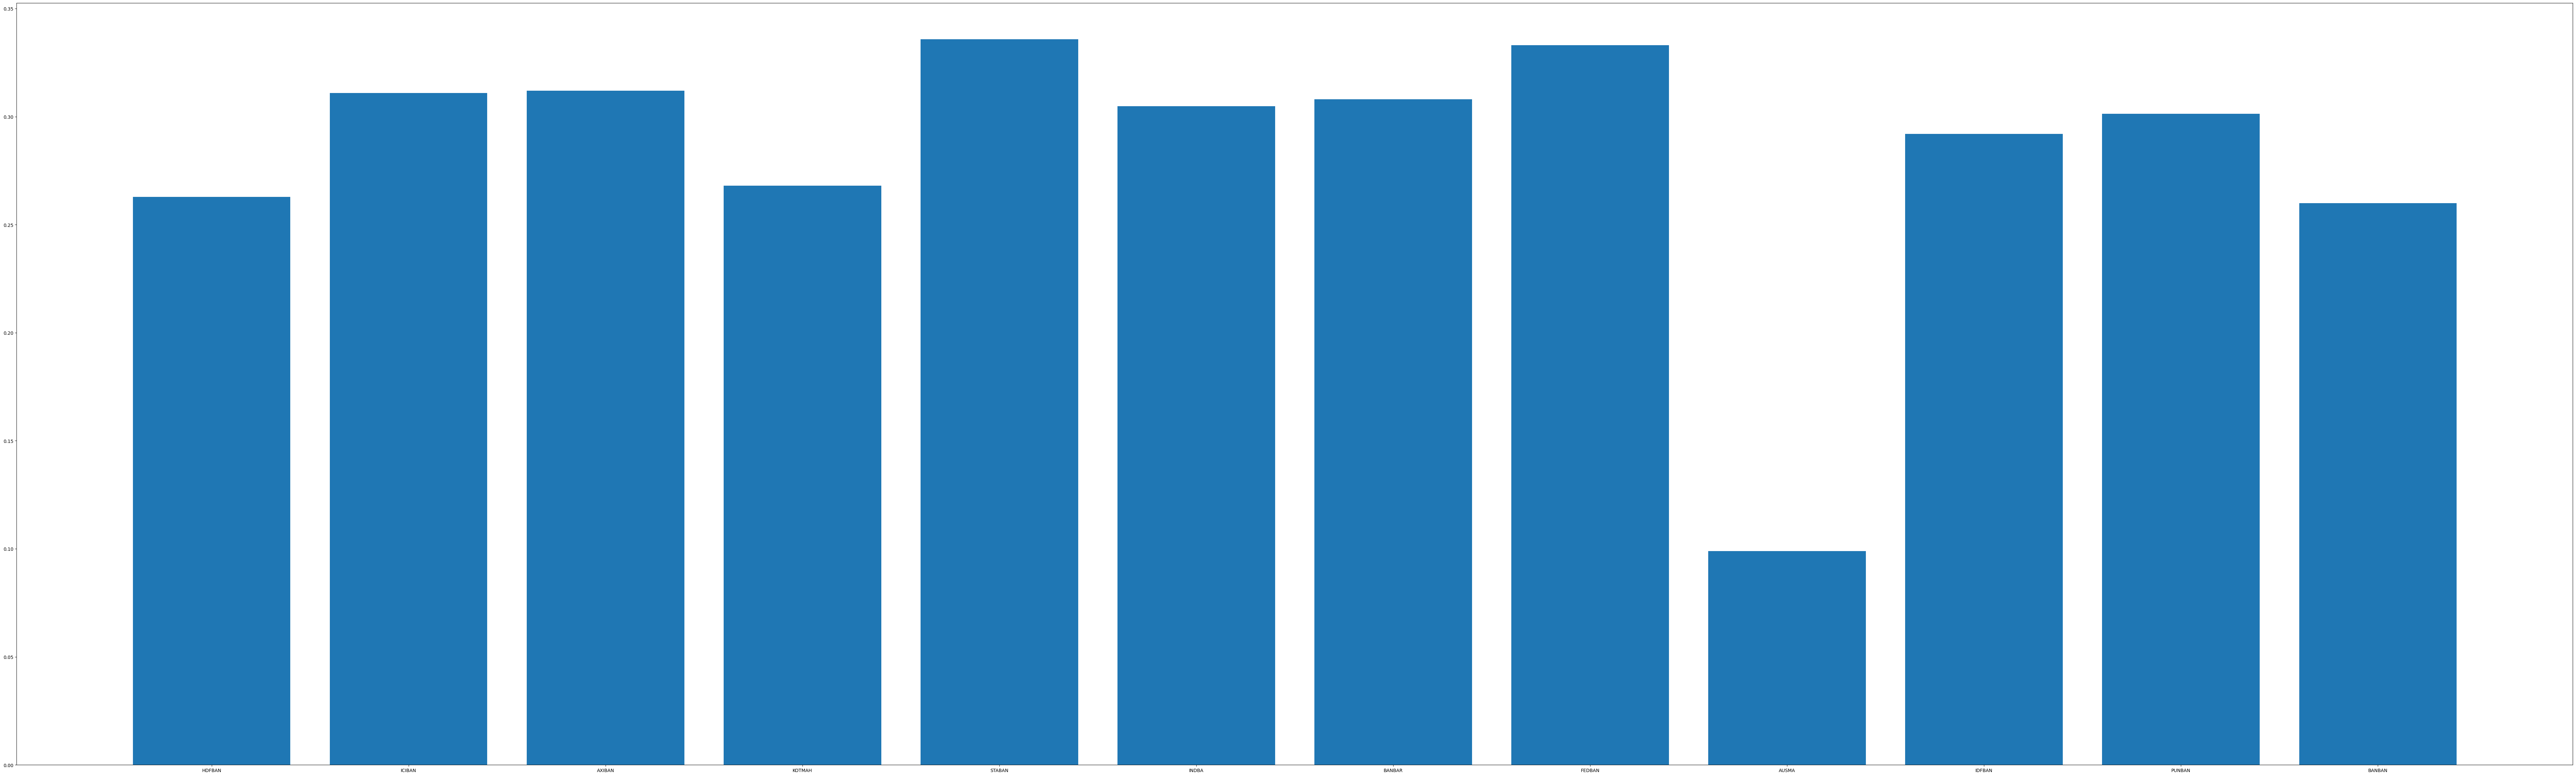

In [ ]:
fig = plt.figure(figsize =(100, 30))
plt.bar(bank_cons , list(eigenvectors[0]) )


<BarContainer object of 12 artists>

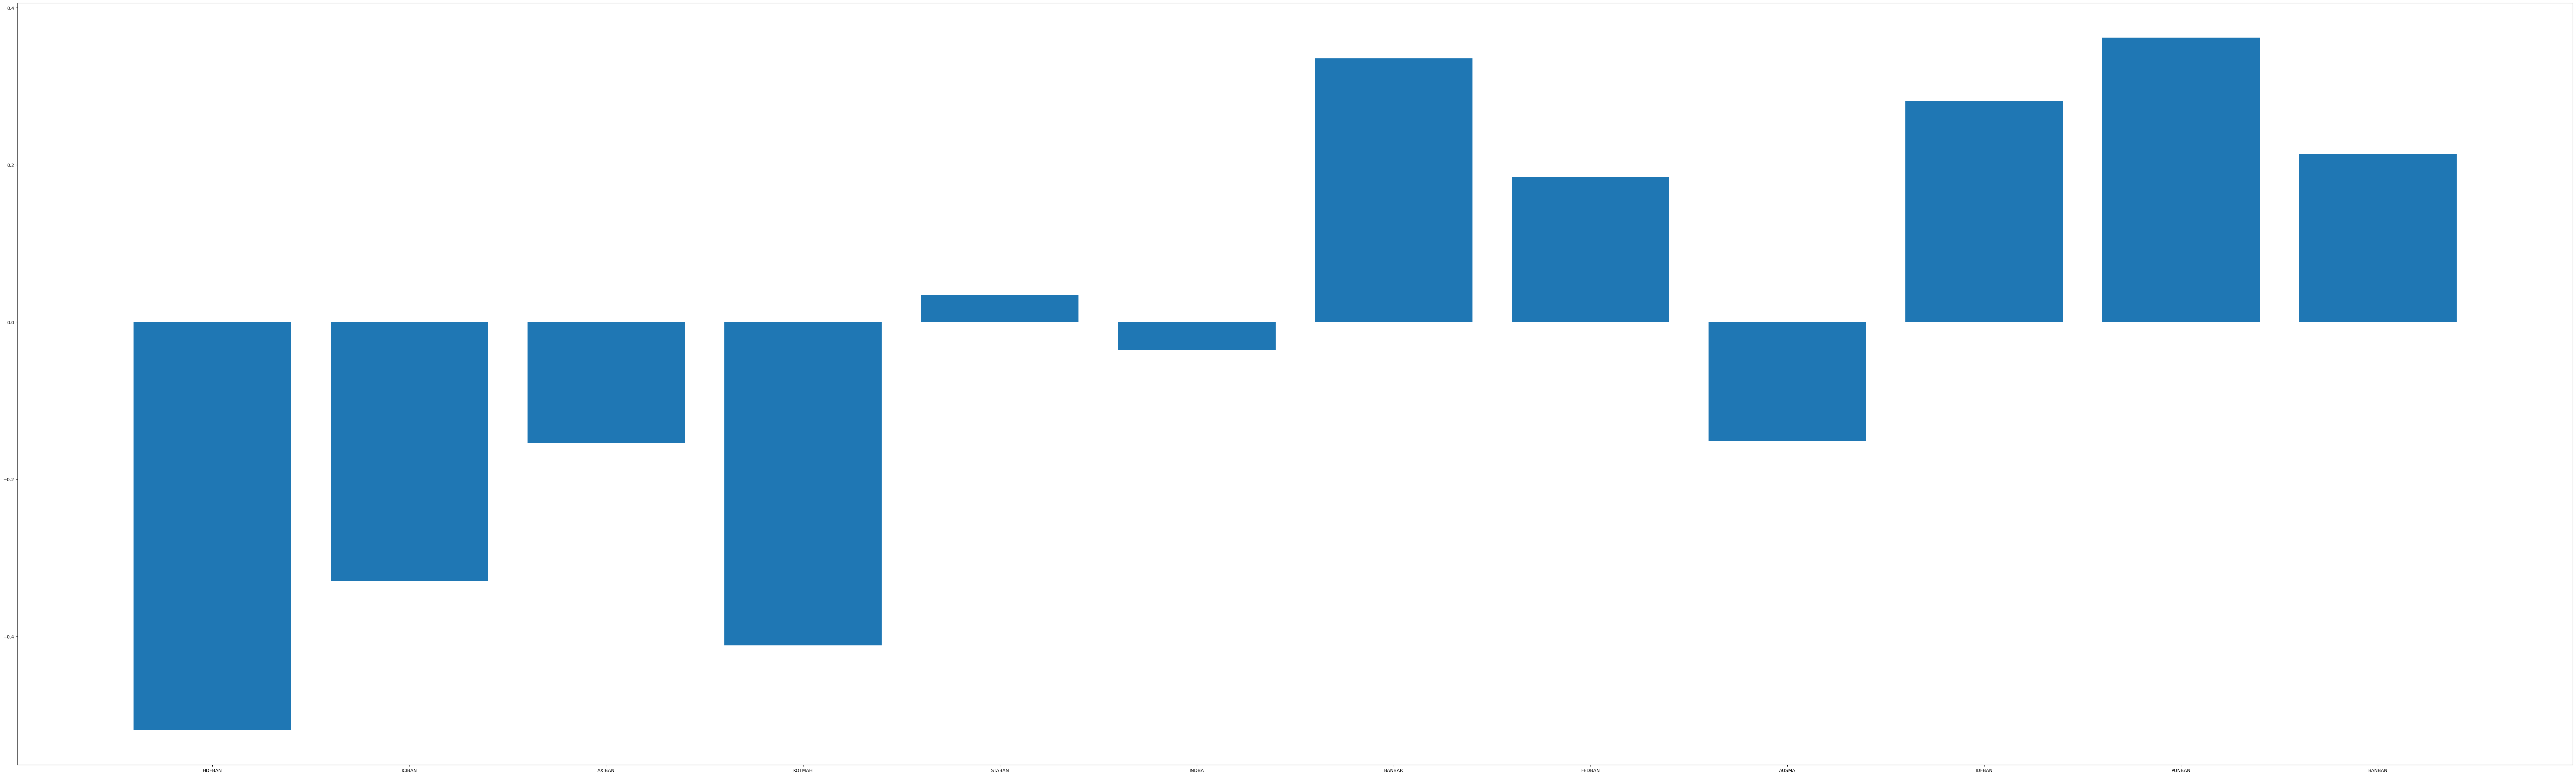

In [ ]:
fig = plt.figure(figsize =(100, 30))
plt.bar(bank_cons , list(eigenvectors[1]) )

<BarContainer object of 12 artists>

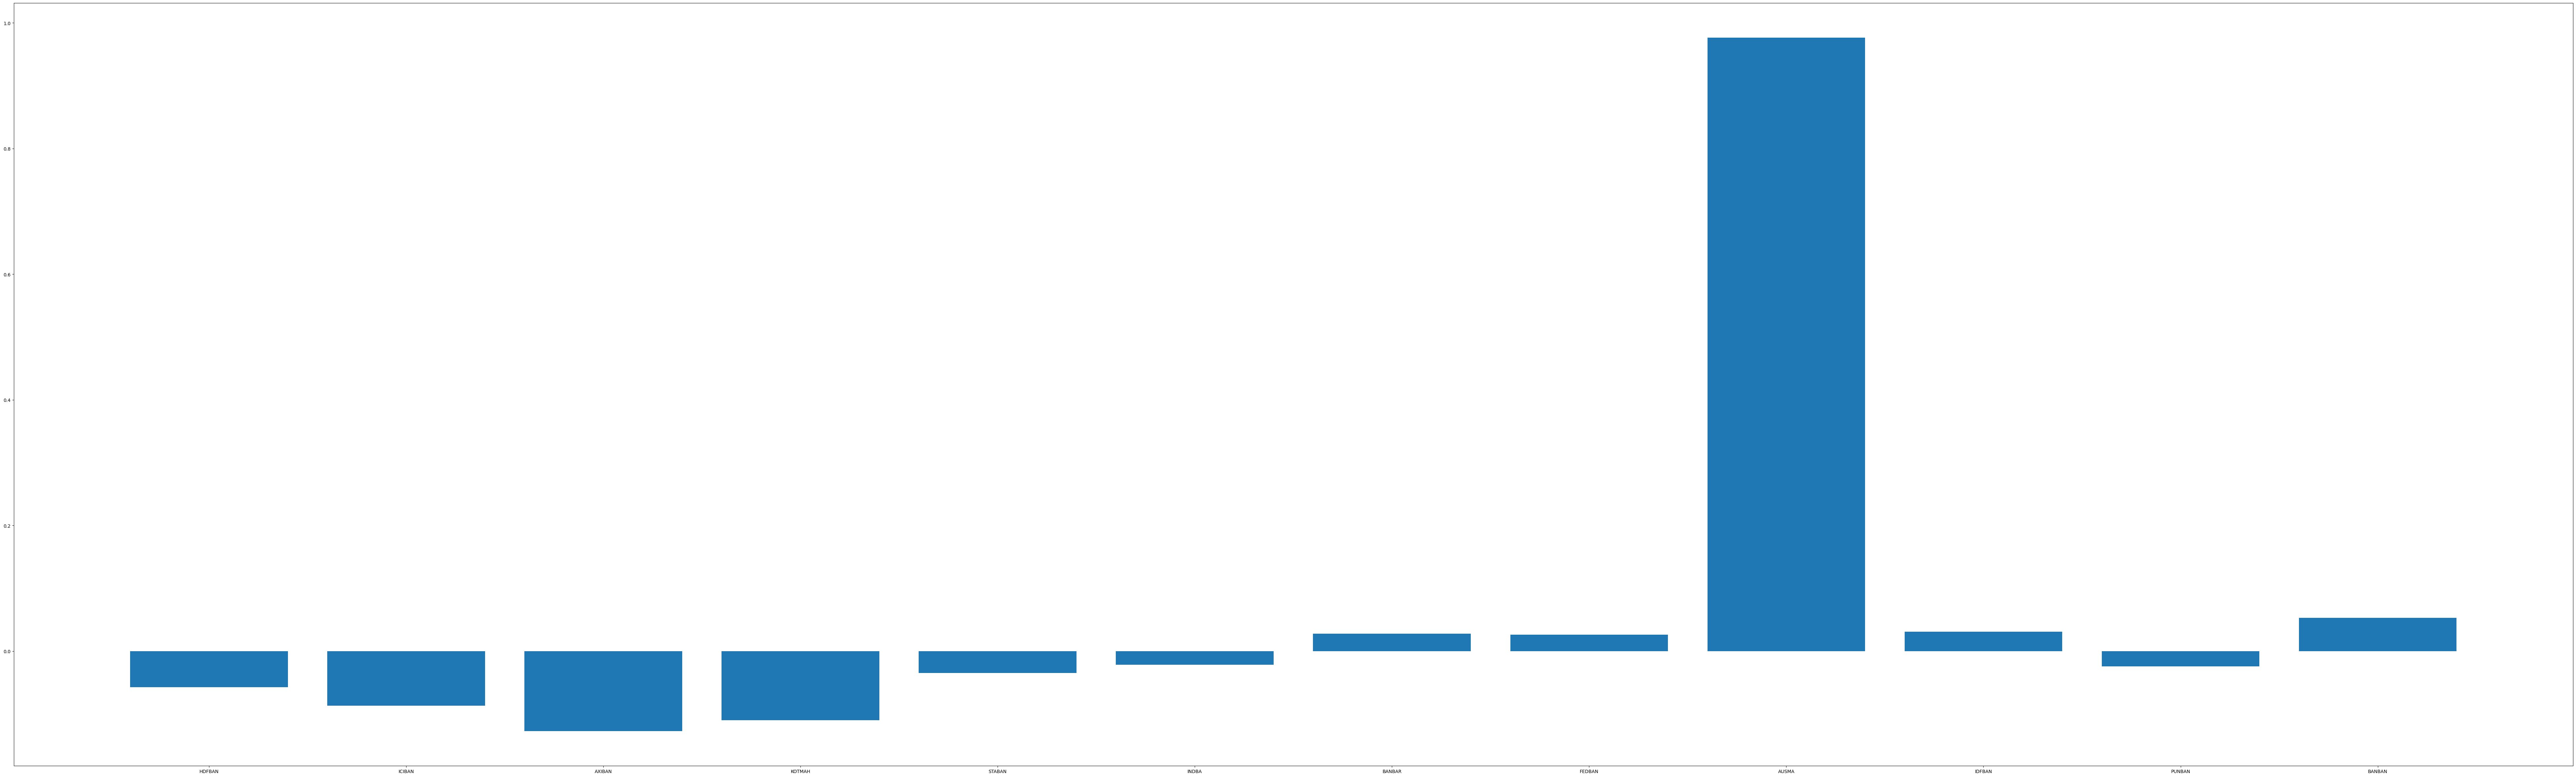

In [ ]:
fig = plt.figure(figsize =(100, 30))
plt.bar(bank_cons , list(eigenvectors[2]) )

<BarContainer object of 12 artists>

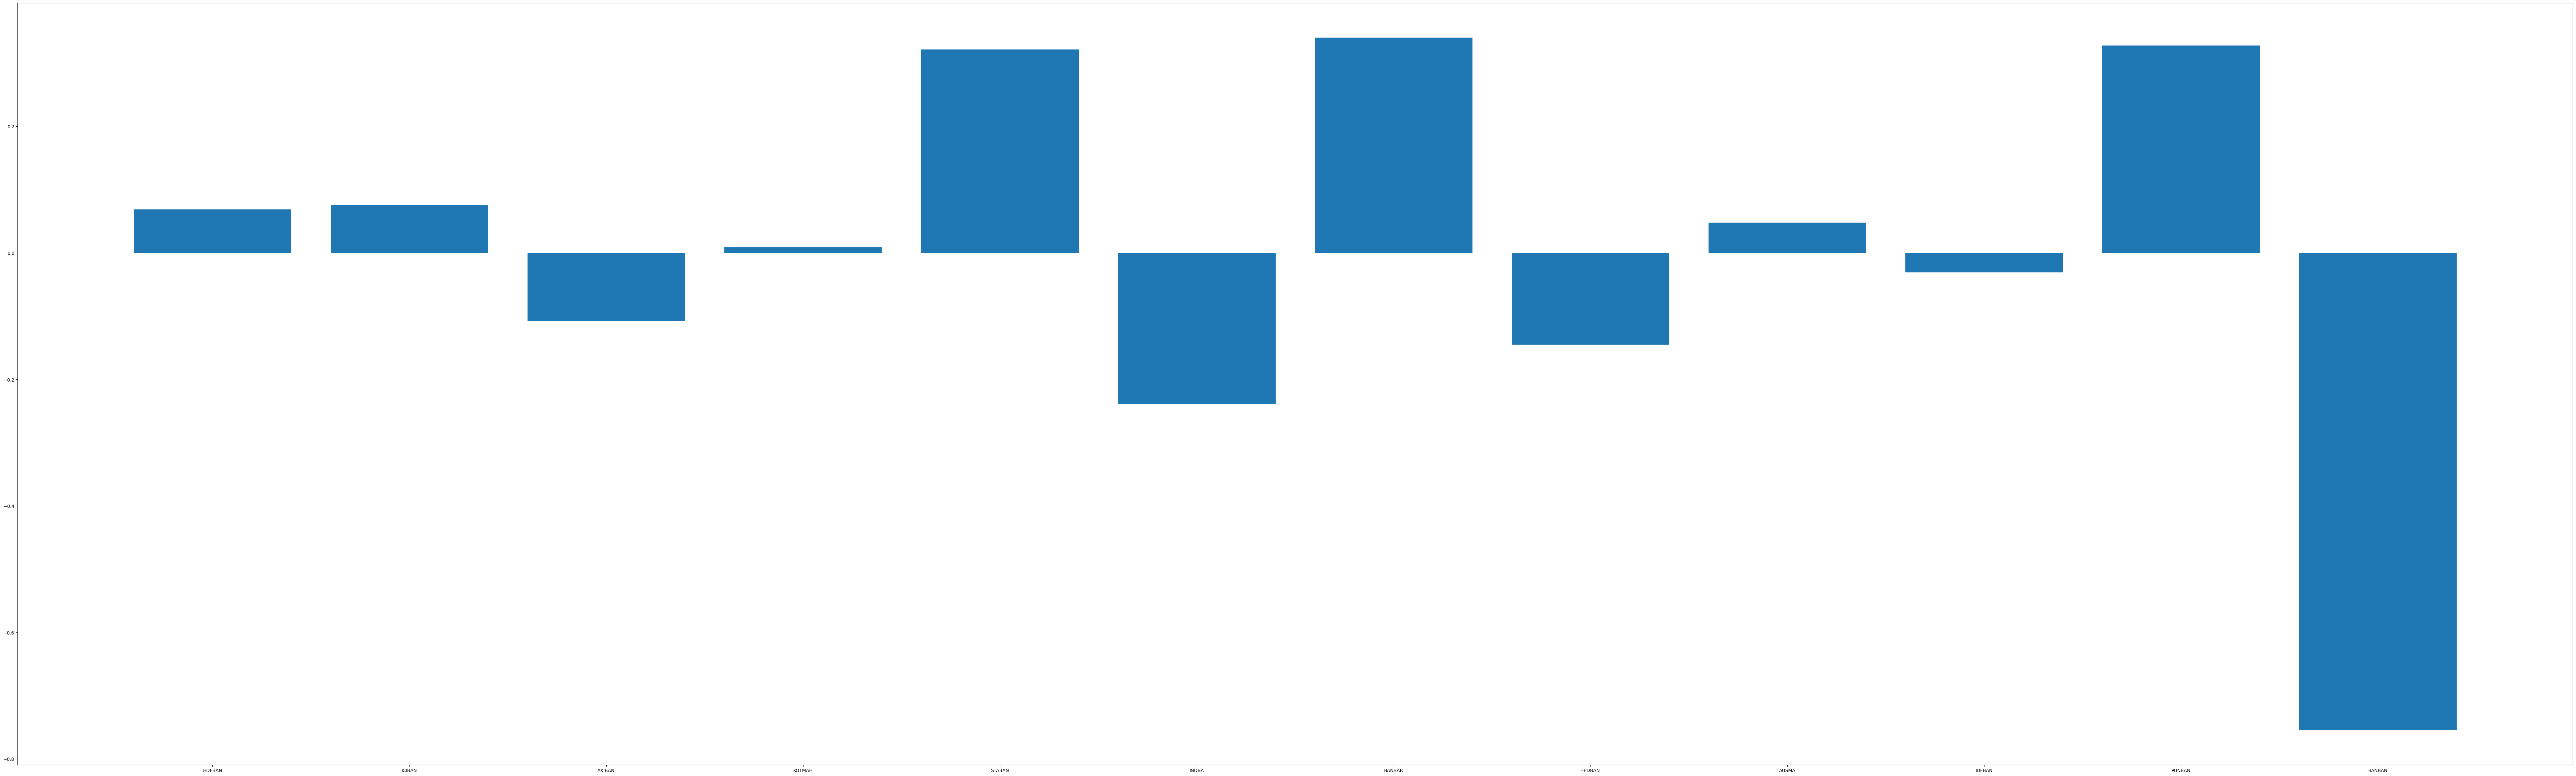

In [ ]:
fig = plt.figure(figsize =(100, 30))
plt.bar(bank_cons , list(eigenvectors[-1]) )

In [ ]:
snp_prices = nft_returns
eigenportfolios = eigenportfolio

eigenportfolios[0]

HDFBAN    0.003048
ICIBAN    0.002953
AXIBAN    0.004534
KOTMAH    0.002626
STABAN    0.004439
INDBA     0.002712
BANBAR    0.010715
FEDBAN    0.019192
AUSMA     0.000457
IDFBAN    0.035978
PUNBAN    0.054325
BANBAN    0.007589
dtype: float64

In [ ]:
port = []
for j in range(0,4) :
  sstr = ''
  for i in range (len(bank_cons)) :
    sstr = sstr  + '  ' +  str(int(np.round(list(eigenportfolios[j])[i]*1000))) +  '*' + str(bank_cons[i])
  port.append(sstr)

print(port[0])
print()
print(port[1])
print()
print(port[2])
print()
print(port[3])

  3*HDFBAN  3*ICIBAN  5*AXIBAN  3*KOTMAH  4*STABAN  3*INDBA  11*BANBAR  19*FEDBAN  0*AUSMA  36*IDFBAN  54*PUNBAN  8*BANBAN

  -6*HDFBAN  -3*ICIBAN  -2*AXIBAN  -4*KOTMAH  0*STABAN  0*INDBA  12*BANBAR  11*FEDBAN  -1*AUSMA  35*IDFBAN  65*PUNBAN  6*BANBAN

  -1*HDFBAN  -1*ICIBAN  -2*AXIBAN  -1*KOTMAH  0*STABAN  0*INDBA  1*BANBAR  2*FEDBAN  5*AUSMA  4*IDFBAN  -4*PUNBAN  2*BANBAN

  1*HDFBAN  1*ICIBAN  -2*AXIBAN  0*KOTMAH  4*STABAN  -2*INDBA  12*BANBAR  -8*FEDBAN  0*AUSMA  -4*IDFBAN  59*PUNBAN  -22*BANBAN


In [ ]:
nft_price

HDFBAN  ICIBAN  AXIBAN   KOTMAH  STABAN    INDBA  BANBAR  FEDBAN  \
1    1426.70  537.25  664.45  1959.75  281.75   921.65   65.60   72.30   
2    1420.55  546.70  654.25  1970.40  285.05   922.35   65.50   72.70   
3    1416.25  541.10  671.10  1952.40  287.70   952.05   66.15   75.65   
4    1431.65  542.05  672.70  1970.70  286.00   939.80   65.55   75.75   
5    1451.45  544.70  666.95  1938.15  282.50   929.10   64.25   74.80   
..       ...     ...     ...      ...     ...      ...     ...     ...   
490  1629.45  893.50  928.70  1813.55  597.10  1194.00  177.10  130.75   
491  1631.10  900.65  932.20  1820.90  601.90  1202.00  177.60  132.95   
492  1628.50  898.95  924.70  1820.10  601.00  1210.40  181.80  133.65   
493  1641.30  908.05  940.10  1820.00  611.80  1231.15  186.75  137.65   
494  1630.00  892.95  933.75  1826.00  614.25  1220.10  185.70  139.50   

      AUSMA  IDFBAN  PUNBAN  BANBAN  
1    884.65   39.70   35.60  401.85  
2    889.55   41.40   35.20  396.00  
3    888.00   45.80   35.45  405.80  
4    893.60   44.40   35.40  419.40  
5    899.45   44.45   34.90  408.40  
..      ...     ...     ...     ...  
490  658.00   55.65   53.50  233.90  
491  663.35   55.95   54.20  236.95  
492  662.90   55.85   54.90  233.00  
493  665.00   57.30   55.40  236.00  
494  654.95   58.80   56.45  234.25  

[494 rows x 12 columns]

In [ ]:
df_ep = nft_price@np.array(eigenportfolios).T
df_ep

0          1         2         3
1    26.750361 -12.703004 -0.248658 -6.645671
2    26.761671 -12.718546 -0.224812 -6.519032
3    27.162603 -12.378129 -0.207254 -6.841678
4    27.275058 -12.524693 -0.197009 -7.114673
5    27.048812 -12.635397 -0.153931 -6.876529
..         ...        ...       ...       ...
490  33.857581 -12.232879 -2.308500 -0.418065
491  34.083891 -12.202397 -2.302844 -0.451335
492  34.116311 -12.090267 -2.292602 -0.292121
493  34.588838 -12.031048 -2.317634 -0.314316
494  34.595058 -11.797014 -2.336495 -0.224981

[494 rows x 4 columns]

In [ ]:
df_ep_returns = df_ep.pct_change()*100
df_ep_returns.dropna(inplace = True)
df_ep_returns.reset_index(inplace = True)
df_ep_returns.drop(['index'] , axis = 1, inplace = True)
df_ep_returns

0         1          2          3
0    0.042280  0.122349  -9.589725  -1.905594
1    1.498157 -2.676540  -7.810409   4.949296
2    0.414009  1.184059  -4.942829   3.990180
3   -0.829498  0.883886 -21.866059  -3.347225
4    0.899248 -0.917521  -2.900138  -8.416037
..        ...       ...        ...        ...
488  3.184015 -2.320364   0.391300 -20.424401
489  0.668418 -0.249185  -0.245007   7.958178
490  0.095118 -0.918913  -0.444759 -35.276201
491  1.385047 -0.489806   1.091835   7.597729
492  0.017983 -1.945251   0.813812 -28.422131

[493 rows x 4 columns]

<Axes: >

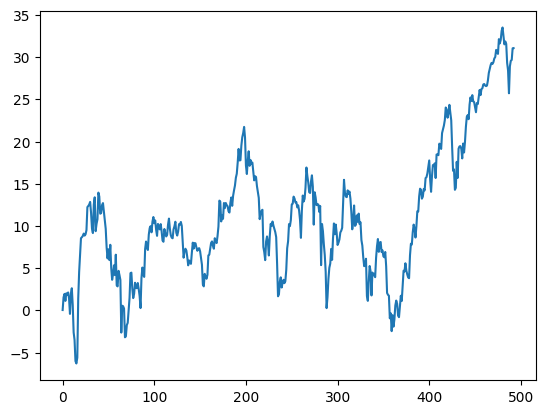

In [ ]:
df_ep_returns[df_ep_returns.columns[0]].cumsum().plot()

In [ ]:
#PSEUDO CODE
df_ep_returns[df_ep_returns.columns[0]].cumsum().plot(figsize = (12,6))
(m1.close.pct_change()*100).cumsum().plot(figsize = (12,6))

k1 =(m1.close.pct_change()*100).cumsum()[2:].reset_index()
k1.drop(['datetime'], axis = 1, inplace = True)
k1['close']

( df_ep_returns[df_ep_returns.columns[0]].cumsum()  - k1['close'] ).plot(figsize = (12,6))

m1.pct_change()

from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
reg.fit(df_ep_returns,nft[nft.columns[0]][1:])

reg.coef_
nft = nft[1:]

nft.reset_index(inplace = True)

nft.drop(['index'], axis = 1, inplace = True)

nft

In [ ]:
( nft[nft.columns[0]] - reg.coef_[0]*df_ep_returns[0] - reg.coef_[1]*df_ep_returns[1] - reg.coef_[2]*df_ep_returns[2] - reg.coef_[3]*df_ep_returns[3] ).cumsum().plot(figsize = (12,6))

In [ ]:
coeff = []
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
for i in range(len(nft.columns)) :
  print(i)
  reg.fit(df_ep_returns,nft[nft.columns[i]][1:])
  print(reg.coef_)
  coeff.append(reg.coef_)

0
[ 3.03000476e-01  3.07680097e-01 -1.61606294e-04  7.50018586e-05]
1
[ 4.50133208e-01  1.19687878e-01  1.02363879e-05 -2.66411793e-04]
2
[ 5.08099948e-01  2.25595863e-02 -1.04129657e-04  2.24025471e-04]
3
[ 3.48921674e-01  2.51200978e-01  6.76816517e-05 -6.21152683e-07]
4
[ 5.76131305e-01 -6.37405767e-02 -8.23543595e-05 -4.93314640e-04]
5
[ 5.36689448e-01 -3.72898997e-02 -6.25205876e-05  1.60219333e-04]
6
[ 6.02445771e-01 -2.11800186e-01  8.04658900e-05 -9.05319493e-04]
7
[ 6.26258261e-01 -1.53373963e-01  9.18106797e-05 -5.05434212e-04]
8
[1.28667248e-01 8.29229478e-02 3.50427074e-04 3.61237488e-05]
9
[ 5.80646686e-01 -1.87881813e-01 -4.31087632e-05  4.50065593e-05]
10
[ 6.27171868e-01 -2.50736297e-01  1.26679271e-04  1.95536166e-04]
11
[ 5.43306506e-01 -1.84847299e-01 -9.01342429e-05  8.66042465e-04]


In [ ]:
coeff

[array([ 3.03000476e-01,  3.07680097e-01, -1.61606294e-04,  7.50018586e-05]),
 array([ 4.50133208e-01,  1.19687878e-01,  1.02363879e-05, -2.66411793e-04]),
 array([ 5.08099948e-01,  2.25595863e-02, -1.04129657e-04,  2.24025471e-04]),
 array([ 3.48921674e-01,  2.51200978e-01,  6.76816517e-05, -6.21152683e-07]),
 array([ 5.76131305e-01, -6.37405767e-02, -8.23543595e-05, -4.93314640e-04]),
 array([ 5.36689448e-01, -3.72898997e-02, -6.25205876e-05,  1.60219333e-04]),
 array([ 6.02445771e-01, -2.11800186e-01,  8.04658900e-05, -9.05319493e-04]),
 array([ 6.26258261e-01, -1.53373963e-01,  9.18106797e-05, -5.05434212e-04]),
 array([1.28667248e-01, 8.29229478e-02, 3.50427074e-04, 3.61237488e-05]),
 array([ 5.80646686e-01, -1.87881813e-01, -4.31087632e-05,  4.50065593e-05]),
 array([ 6.27171868e-01, -2.50736297e-01,  1.26679271e-04,  1.95536166e-04]),
 array([ 5.43306506e-01, -1.84847299e-01, -9.01342429e-05,  8.66042465e-04])]

In [ ]:
nft = pd.DataFrame()
nft_price = pd.DataFrame()
start = "2023-01-01T07:00:00.000Z"
stop =  "2023-03-31T07:00:00.000Z"
for i in range (len(bank_cons)) :
  print( bank_cons[i])
  n = breeze.get_historical_data_v2(interval="1day",
                            from_date= start,
                            to_date= stop,
                            stock_code=  bank_cons[i] ,
                            exchange_code="NSE",
                            product_type="cash")

  m =pd.DataFrame(n['Success'])
  m.index = m.datetime
  m.drop( columns = {'datetime' , 'exchange_code' , 'stock_code' , 'volume' }  , inplace = True)
  m.rename( {'datetime' : 'date'} , inplace = True)
  #print(i)
  #print(nifty_cons[i])
  #print(m[m.index.duplicated()])
  #print(len(m))
  m.reset_index(inplace = True)
  nft[bank_cons[i]] =m.close.pct_change()[1:]*100
  nft_price[bank_cons[i]] =m.close[1:]

HDFBAN
ICIBAN
AXIBAN
KOTMAH
STABAN
INDBA
BANBAR
FEDBAN
AUSMA
IDFBAN
PUNBAN
BANBAN


In [ ]:
nft_price

HDFBAN  ICIBAN  AXIBAN   KOTMAH  STABAN    INDBA  BANBAR  FEDBAN   AUSMA  \
1   1639.35  901.35  962.30  1832.85  612.40  1240.60  187.50  137.75  651.05   
2   1610.05  899.10  957.45  1824.90  605.20  1220.95  182.50  136.40  639.00   
3   1599.70  879.15  949.55  1820.30  605.10  1215.00  184.05  136.65  633.55   
4   1594.05  870.10  941.00  1788.90  601.00  1182.00  183.25  134.60  625.95   
5   1597.95  873.35  957.10  1811.90  608.45  1218.00  185.15  135.65  633.20   
..      ...     ...     ...      ...     ...      ...     ...     ...     ...   
57  1559.65  851.45  839.20  1687.00  505.05  1009.40  159.55  126.70  558.70   
58  1560.70  845.70  832.00  1700.00  508.95  1012.30  160.50  125.10  564.15   
59  1581.60  856.75  833.65  1698.50  509.00  1033.00  161.00  126.00  562.90   
60  1593.00  855.00  846.10  1724.35  517.00  1057.00  164.70  129.30  584.00   
61  1609.20  876.90  857.10  1733.50  523.00  1069.00  169.20  132.00  578.00   

    IDFBAN  PUNBAN  BANBAN  
1    61.35   57.80  240.55  
2    60.20   56.25  239.70  
3    60.35   56.75  240.50  
4    59.50   56.40  243.20  
5    59.60   57.10  247.25  
..     ...     ...     ...  
57   54.00   45.30  202.50  
58   53.00   45.50  197.35  
59   52.65   45.05  187.25  
60   54.75   46.30  190.95  
61   54.95   46.55  194.75  

[61 rows x 12 columns]

In [ ]:
ban_stk_ret = nft_price.pct_change()[1:]
ban_stk_ret.reset_index(inplace = True)

ban_stk_ret.drop(['index'], axis = 1, inplace = True)

ban_stk_ret

HDFBAN    ICIBAN    AXIBAN    KOTMAH    STABAN     INDBA    BANBAR  \
0  -0.017873 -0.002496 -0.005040 -0.004338 -0.011757 -0.015839 -0.026667   
1  -0.006428 -0.022189 -0.008251 -0.002521 -0.000165 -0.004873  0.008493   
2  -0.003532 -0.010294 -0.009004 -0.017250 -0.006776 -0.027160 -0.004347   
3   0.002447  0.003735  0.017109  0.012857  0.012396  0.030457  0.010368   
4  -0.018555 -0.011908 -0.004284 -0.009024 -0.021859  0.007841 -0.024035   
5   0.013199  0.002144 -0.003882  0.003509  0.002604 -0.011649  0.003044   
6   0.005035 -0.002370 -0.014484 -0.012404 -0.002933 -0.005069  0.002483   
7   0.002505  0.009562 -0.001764  0.000450  0.009665  0.022616  0.017611   
8  -0.009806 -0.006889 -0.022219  0.002528  0.004162  0.002471  0.004867   
9   0.014887  0.002312  0.004983  0.007200 -0.016247 -0.005738 -0.019376   
10  0.017652  0.002884  0.006865  0.000807 -0.003286 -0.005974 -0.021679   
11  0.004153 -0.003853  0.005087 -0.017676 -0.002705 -0.018357 -0.001964   
12  0.010249  0.006350  0.000861 -0.002490  0.005256  0.001583  0.010680   
13  0.006593  0.000057  0.003443  0.011827  0.013576  0.001871  0.005006   
14  0.014116  0.000287 -0.024124 -0.013174 -0.011730  0.006309 -0.015219   
15 -0.027632 -0.019095 -0.019611 -0.005937 -0.042512 -0.042316 -0.046080   
16 -0.019925 -0.044546 -0.020564 -0.021031 -0.046949 -0.038415 -0.073638   
17 -0.001021  0.007709 -0.001030  0.007735 -0.007011 -0.019572  0.015898   
18 -0.005173  0.013965 -0.001661  0.005069  0.034838 -0.010141  0.050704   
19  0.012268  0.017964 -0.015660  0.004553 -0.053775 -0.040150 -0.081323   
20 -0.013780  0.008941  0.013345  0.010959  0.009583  0.038511  0.006161   
21  0.034402  0.005072  0.014377  0.008627  0.024528  0.023241  0.056719   
22 -0.004975 -0.006555  0.000227 -0.016515 -0.002844  0.023437  0.019823   
23  0.001212 -0.004905 -0.003117  0.015533  0.004875  0.008842  0.007476   
24 -0.000605  0.005222 -0.008642 -0.006704  0.007689  0.006179 -0.001187   
25 -0.000485  0.005195 -0.005162  0.003914  0.001090  0.016506  0.008618   
26  0.001273 -0.006504 -0.001095  0.000339  0.003448 -0.000857 -0.000589   
27  0.003934 -0.006897 -0.009638  0.000169 -0.028577 -0.009220 -0.023880   
28  0.008560  0.018246  0.012937 -0.001383  0.007261  0.003246  0.018423   
29 -0.002391  0.008555 -0.000690  0.009783  0.003327 -0.008197  0.005338   
30 -0.004793 -0.006362 -0.006678  0.002912 -0.007001 -0.003175 -0.000590   
31 -0.003010 -0.005480 -0.007187 -0.016165 -0.015584 -0.029541 -0.015053   
32 -0.009360 -0.010382 -0.013660 -0.014188 -0.010177 -0.001799 -0.014384   
33  0.005181  0.001993 -0.001657 -0.003857 -0.002666 -0.008108 -0.027972   
34 -0.021104 -0.020062 -0.014050 -0.016645 -0.013459 -0.007811 -0.017516   
35 -0.006938  0.004536  0.017978  0.003820  0.012095 -0.014097 -0.003184   
36 -0.009046 -0.001842  0.003898 -0.005855 -0.002868  0.000929 -0.012775   
37  0.005980  0.021370  0.004942  0.017580  0.011505  0.004406  0.029440   
38  0.003129 -0.003380 -0.010539  0.002373 -0.009573 -0.005264 -0.005028   
39 -0.002495  0.000819  0.022959  0.008112  0.026414  0.025068  0.038534   
40 -0.009443 -0.005259 -0.023600 -0.015006 -0.003450 -0.003714 -0.000912   
41  0.020266  0.017975  0.012915  0.018694  0.049682  0.024592  0.050228   
42  0.007642  0.002885  0.005907 -0.000799  0.001515 -0.002839  0.002319   
43  0.001013  0.003452  0.001570 -0.004313  0.003026  0.045115  0.006940   
44  0.000000 -0.017890  0.004296 -0.016093 -0.008518 -0.006769 -0.014934   
45 -0.025153 -0.016815 -0.016647 -0.007989 -0.019420 -0.017616 -0.021574   
46 -0.011013 -0.013242 -0.021867 -0.014254 -0.032582 -0.074302 -0.022646   
47 -0.002227  0.001986  0.002764 -0.017442 -0.007547  0.002027 -0.009451   
48 -0.015976 -0.010931 -0.013664  0.011318 -0.016825 -0.018109 -0.022468   
49  0.006384  0.002611  0.011666  0.001050  0.016436 -0.022132  0.010076   
50  0.017002  0.015081  0.005946  0.017894  0.010178  0.000294 -0.002805   
51 -0.010860 -0.001372  0.000537  0.000618 -0.021375 -

In [ ]:
df_ep = nft_price@np.array(eigenportfolios).T
df_ep

0          1         2         3
1   35.039989 -11.757465 -2.417870 -0.340825
2   34.598906 -11.738582 -2.432239 -0.466653
3   34.501508 -11.508306 -2.411234 -0.438602
4   34.148159 -11.352791 -2.377947 -0.457038
5   34.549918 -11.420548 -2.408321 -0.552726
..        ...        ...       ...       ...
57  30.819059 -11.920000 -2.338712 -0.355212
58  30.749707 -12.007445 -2.327161 -0.180774
59  30.814316 -12.260520 -2.374332 -0.007444
60  31.352978 -12.218780 -2.327464 -0.028774
61  31.747016 -12.315067 -2.404632 -0.056984

[61 rows x 4 columns]

In [ ]:
df_ep_returns = df_ep.pct_change()*100
df_ep_returns.dropna(inplace = True)
df_ep_returns.reset_index(inplace = True)
df_ep_returns.drop(['index'] , axis = 1, inplace = True)
df_ep_returns

0         1         2           3
0  -1.258799 -0.160608  0.594292   36.918688
1  -0.281505 -1.961698 -0.863617   -6.011172
2  -1.024157 -1.351331 -1.380489    4.203271
3   1.176518  0.596833  1.277313   20.936551
4  -1.256936 -0.435513 -0.789275   43.219463
5   0.396984  0.184277  1.228618  -22.854397
6  -0.532012 -0.121509 -3.003169  -16.534718
7   0.837517 -0.849324  2.237224  -15.280400
8   0.192616 -2.971817 -2.772561  -18.204530
9  -0.333638  3.675743  0.794602   23.427737
10 -0.099800  2.887592  1.263517   15.342936
11 -0.406695 -0.848791  0.647570  -27.258143
12  0.170351  0.899948  1.586255   -7.396155
13  0.790465  0.760234 -3.975439   63.808467
14 -0.721556  1.263856 -0.833490   13.677838
15 -2.587626 -0.934849 -0.390534   22.952503
16 -3.007603 -0.999708 -3.658686   33.154032
17  0.173459 -0.184762 -0.246877   -2.847732
18  1.287588 -2.878506 -2.487626  -28.830043
19 -2.106118  5.889641  2.611034   21.160603
20  1.025578 -0.988812 -1.587381  -13.381647
21  1.578218  2.620248  3.671258  -29.382272
22  0.080433 -2.044031 -2.333811   47.338121
23  0.263080  0.981878 -3.238805   -5.987260
24  0.052159 -0.729129 -1.057412    9.090443
25  0.041784  0.556379  2.306128   11.842748
26  0.139999 -0.239874 -2.745387    3.665585
27 -1.074542  1.705428  2.688617   -2.107627
28  0.546620  0.890499  2.895005  -11.970678
29  0.380916 -0.095426 -0.483778   11.694670
30 -0.378695 -0.184174  1.565532    2.470773
31 -1.493858  0.075697  0.324949  -14.812736
32 -0.954985 -1.459589 -0.430024    5.038903
33 -0.415683  1.256462 -0.049222   -4.031236
34 -1.698253 -1.788534 -2.353818   10.461004
35  0.593396 -0.999573  0.856741   -1.634824
36 -0.501618 -0.214096 -0.878536    9.738875
37  1.038098  1.104429  3.453847  -13.539643
38 -0.014292 -0.308222 -0.437742    6.331818
39  1.821373 -1.681327 -1.474814   -0.522417
40 -0.993481 -1.567406 -2.927833   -1.732623
41  2.323594  0.959492  1.894282  -35.639862
42  0.182540  0.774398 -0.350483   -5.058442
43  0.590658 -0.239753 -0.418752    8.153060
44 -0.872021 -0.230646 -0.218629    1.104356
45 -1.596405 -1.916630 -3.967852   12.469519
46 -2.641281 -0.382931  2.088078  -22.222140
47 -0.734113 -0.130478  0.783036  -45.825942
48 -0.976299 -0.316526  0.553141   26.045927
49  0.450139  0.118617 -0.282337  -38.603980
50  0.873512  2.729849  2.531499    7.463009
51 -0.952645  0.259385  2.145987  -20.052729
52  1.226720  0.784435  2.344036  -16.549671
53  0.459930 -1.250285 -1.144396  109.419895
54 -1.206785 -0.440607  0.136200   41.312130
55 -1.048936  1.986003  2.070859  -18.801477
56 -0.225027  0.733595 -0.493914  -49.108123
57  0.210111  2.107649  2.027002  -95.882195
58  1.748091 -0.340444 -1.973961  286.547300
59  1.256778  0.788031  3.315562   98.037438

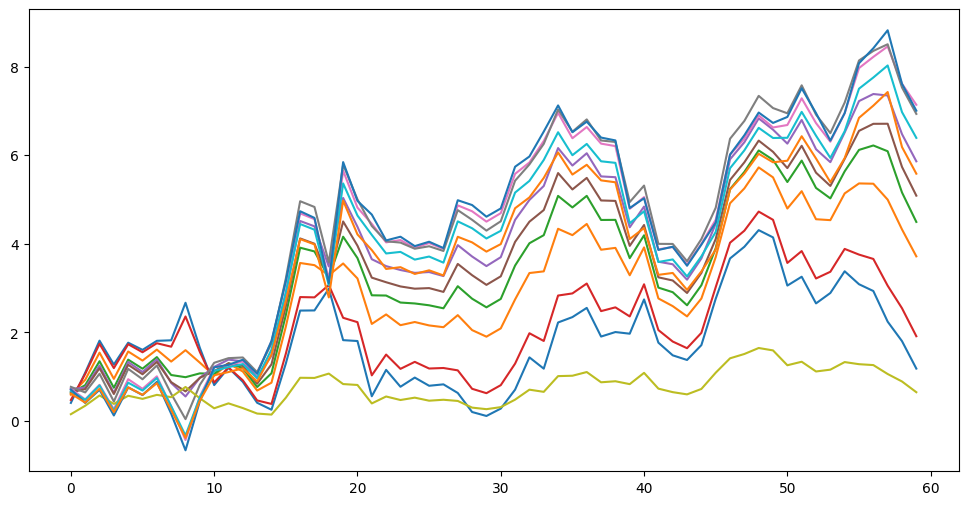

In [ ]:
ideo = pd.DataFrame()
for i in range(len(bank_cons)) :
  #id = 0
  #id = ban_stk_ret[ban_stk_ret.columns[i]] -coeff[i][0]*df_ep_returns[0] - coeff[i][1]*df_ep_returns[1] - coeff[i][2]*df_ep_returns[[2]] -coeff[i][3]*df_ep_returns[3]
  ( ban_stk_ret[ban_stk_ret.columns[i]] - coeff[i][0]*df_ep_returns[0] - coeff[i][1]*df_ep_returns[1] - coeff[i][2]*df_ep_returns[2] - coeff[i][3]*df_ep_returns[3] ).cumsum().plot(figsize = (12,6))
  #ideo[ban_stk_ret.columns[i]] =  id

<Axes: >

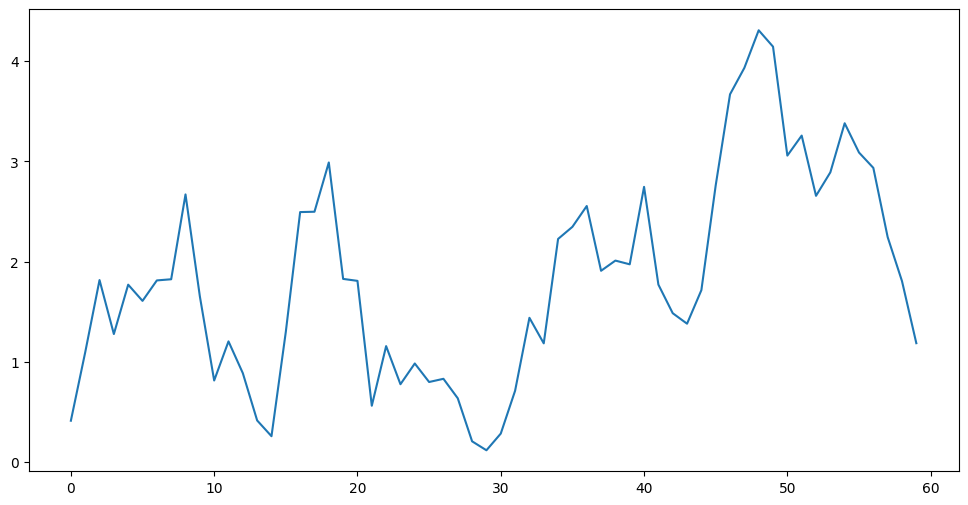

In [ ]:
i = 0
( ban_stk_ret[ban_stk_ret.columns[i]] - coeff[i][0]*df_ep_returns[0] - coeff[i][1]*df_ep_returns[1] - coeff[i][2]*df_ep_returns[2] - coeff[i][3]*df_ep_returns[3] ).cumsum().plot(figsize = (12,6))